 <h2 style="color: darkblue;">a. Introduction et importation des bibliothèques</h2>

In [1]:
# Importation des bibliothèques pour la manipulation des données
import pandas as pd
import numpy as np

# Importation des bibliothèques pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# Réglage de Seaborn pour améliorer l'esthétique des graphiques
sns.set()

# traitement des valeurs manquantes
from sklearn.impute import SimpleImputer

# Importation des outils nécessaires de scikit-learn pour la régression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cette ligne permet d'afficher les graphiques directement dans votre Jupyter Notebook
import missingno as msno
%matplotlib inline


## Metadata (information about the data)
### Health Expenditure (% of GDP) :
        Niveau des dépenses de santé courantes exprimé en pourcentage du PIB. Les estimations des dépenses de santé courantes incluent les biens et services de soins de santé consommés chaque année. Cet indicateur n'inclut pas les dépenses en capital pour la santé telles que les bâtiments, les machines, l'informatique et les stocks de vaccins pour les urgences ou les épidémies.

### Education Expenditure (% of GDP) :
        Les dépenses publiques générales pour l'éducation (courantes, en capital et transferts) sont exprimées en pourcentage du PIB. Cela inclut les dépenses financées par des transferts de sources internationales au gouvernement. Le terme "gouvernement général" fait généralement référence aux gouvernements locaux, régionaux et centraux.

### Unemployment (% total labor force) : 
        Le chômage fait référence au pourcentage de la population active qui est sans emploi mais disponible pour et à la recherche d'un emploi.
### Corruption (CPIA rating) : 
        La transparence, la responsabilité et la corruption dans le secteur public évaluent la mesure dans laquelle l'exécutif peut être tenu pour responsable de son utilisation des fonds et des résultats de ses actions par l'électorat ainsi que par le législatif et le judiciaire, et dans quelle mesure les employés publics au sein de l'exécutif sont tenus de rendre compte des décisions administratives, de l'utilisation des ressources et des résultats obtenus.

### Disability-Adjusted Life Years (DALYs) due to Communicable diseases :
        Un DALY (Disability-Adjusted Life Year ou Année de Vie Corrigée du Handicap) représente la perte de l'équivalent d'une année de pleine santé. Les DALYs pour une maladie transmissible ou une condition de santé sont la somme des années de vie perdues en raison de la mortalité prématurée (YLLs) et des années vécues avec un handicap (YLDs) dues aux cas prévalents de la maladie dans une population.
        
        Les maladies transmissibles sont des maladies causées par des agents pathogènes tels que des bactéries, des virus, des parasites ou des champignons, qui peuvent être transmis directement ou indirectement d'une personne à une autre.
        Non-communicable diseases: Les maladies non transmissibles sont des maladies qui ne se transmettent pas d'une personne à une autre. Elles sont généralement de longue durée et sont le résultat de facteurs génétiques, physiologiques, environnementaux et comportementaux.

### Prevalence of Undernourishment (% of the population) :
        La prévalence de la sous-alimentation est le pourcentage de la population dont la consommation alimentaire habituelle est insuffisante pour fournir les niveaux d'énergie diététique nécessaires au maintien d'une vie normalement active et saine.
### Carbon dioxide emissions (kiloton) :
        Les émissions de dioxyde de carbone proviennent de la combustion de combustibles fossiles et de la fabrication de ciment. Elles incluent le dioxyde de carbone produit lors de la consommation de combustibles solides, liquides et gazeux et du torchage des gaz.

<h2 style="color: darkblue;">b. Chargement et exploration préliminaire des données</h2>

In [2]:
# Charger les données
df = pd.read_csv('life expectancy.csv')

In [3]:
# Afficher toutes les colonnes
df.columns

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')

In [4]:
# Afficher les premieres et dernieres lignes du dataframe
# Afficher les premières lignes
print("Premières lignes des données:")
df.head()

Premières lignes des données:


Country Name Country Code                      Region  \
0           Afghanistan          AFG                  South Asia   
1                Angola          AGO          Sub-Saharan Africa   
2               Albania          ALB       Europe & Central Asia   
3               Andorra          AND       Europe & Central Asia   
4  United Arab Emirates          ARE  Middle East & North Africa   

           IncomeGroup  Year  Life Expectancy World Bank  \
0           Low income  2001                      56.308   
1  Lower middle income  2001                      47.059   
2  Upper middle income  2001                      74.288   
3          High income  2001                         NaN   
4          High income  2001                      74.544   

   Prevelance of Undernourishment      CO2  Health Expenditure %  \
0                            47.8    730.0                   NaN   
1                            67.5  15960.0              4.483516   
2                             4.9   3230.0              7.139524   
3                             NaN    520.0              5.865939   
4                             2.8  97200.0              2.484370   

   Education Expenditure %  Unemployment  Corruption  Sanitation    Injuries  \
0                      NaN     10.809000         NaN         NaN  2179727.10   
1                      NaN      4.004000         NaN         NaN  1392080.71   
2                   3.4587     18.575001         NaN   40.520895   117081.67   
3                      NaN           NaN         NaN   21.788660     1697.99   
4                      NaN      2.493000         NaN         NaN   144678.14   

   Communicable  NonCommunicable  
0    9689193.70       5795426.38  
1   11190210.53       2663516.34  
2     140894.78        532324.75  
3        695.56         13636.64  
4      65271.91        481740.70

In [5]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

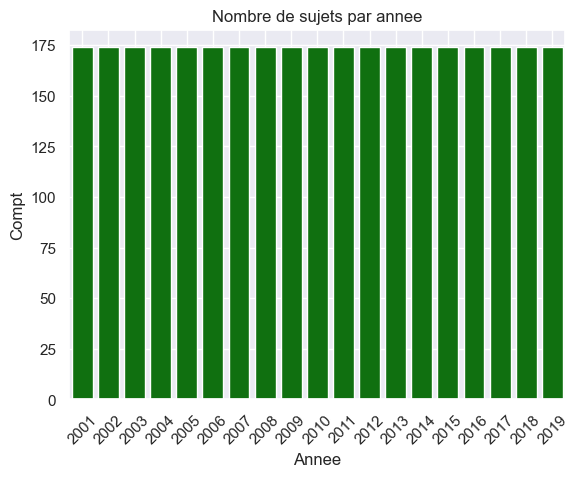

In [6]:
year_counts = df['Year'].value_counts().sort_index()
#Création d'un DataFrame des comptes de sujets par année 
year_counts_df = year_counts.reset_index()
year_counts_df.columns = ['Year', 'Count']

# Afficher l'histogramme
sns.barplot(x='Year', y='Count', data=year_counts_df, color='green')
plt.title('Nombre de sujets par annee')
plt.xlabel('Annee')
plt.ylabel('Compt')
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()


In [7]:
""" On voit que pour chaque année il y a un nombre équivalent de sujets """

' On voit que pour chaque année il y a un nombre équivalent de sujets '

In [8]:
# Changer les années du type integer  au datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

<h2 style="color: navy;">Préparation des données pour la modélisation</h2>

    les données sont séparés en variables explicatives (X) et variable cible (y, l'espérance de vie).
    Division de l'ensemble des données en un ensemble d'entraînement  , un ensemble de validation  et un ensemble de tests.

In [9]:
# Calculer les point de division du jeux de données
split_point1 = int(0.70 * len(df))  # 70% pour training
split_point2 = int(0.85 * len(df))  # 15% suivant pour le jeu de validation

# Diviser le jeux de donnéées
X_train = df[:split_point1] # Premieres 70% pour train set
y_train = X_train['Life Expectancy World Bank'] # Séparer la variable dépendnate 
X_train.drop(['Life Expectancy World Bank'], axis=1, inplace=True)

X_validation = df[split_point1:split_point2]  #  15% pour validation
y_validation = X_validation['Life Expectancy World Bank'] # Séparer la variable dépendnate 
X_validation.drop(['Life Expectancy World Bank'], axis=1, inplace=True)


X_test = df[split_point2:]  # Dernieres 15% pour test set
y_test = X_test['Life Expectancy World Bank']  # Séparer la variable dépendnate 
X_test.drop(['Life Expectancy World Bank'], axis=1, inplace=True)


C:\Users\mikae\AppData\Local\Temp\ipykernel_19632\2183457916.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(['Life Expectancy World Bank'], axis=1, inplace=True)
C:\Users\mikae\AppData\Local\Temp\ipykernel_19632\2183457916.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validation.drop(['Life Expectancy World Bank'], axis=1, inplace=True)
C:\Users\mikae\AppData\Local\Temp\ipykernel_19632\2183457916.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

<h2 style="color: navy;">Analyse exploratoire des données (EDA)</h2>

<h3 style="color: navy;">Analyse des valeurs manquantes</h3>

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314 entries, 0 to 2313
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Country Name                    2314 non-null   object        
 1   Country Code                    2314 non-null   object        
 2   Region                          2314 non-null   object        
 3   IncomeGroup                     2314 non-null   object        
 4   Year                            2314 non-null   datetime64[ns]
 5   Prevelance of Undernourishment  1837 non-null   float64       
 6   CO2                             2208 non-null   float64       
 7   Health Expenditure %            2184 non-null   float64       
 8   Education Expenditure %         1455 non-null   float64       
 9   Unemployment                    2101 non-null   float64       
 10  Corruption                      615 non-null    float64       
 11  Sani

In [11]:
proportion_nans = (X_train.isnull().sum().sum()/df.size)*100
print(f" La proportion des valeurs manquantes dans le jeu de données est de {proportion_nans}%")

 La proportion des valeurs manquantes dans le jeu de données est de 8.22746521476104%


In [12]:
# Explorer les valeurs manquantes
X_train.isnull().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Prevelance of Undernourishment     477
CO2                                106
Health Expenditure %               130
Education Expenditure %            859
Unemployment                       213
Corruption                        1699
Sanitation                         868
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

In [13]:
# Explorer les valeurs manquantes en %
missing_data_percentage = X_train.isnull().sum()* 100 / len(df)
print(missing_data_percentage)

Country Name                       0.000000
Country Code                       0.000000
Region                             0.000000
IncomeGroup                        0.000000
Year                               0.000000
Prevelance of Undernourishment    14.428312
CO2                                3.206292
Health Expenditure %               3.932244
Education Expenditure %           25.983061
Unemployment                       6.442831
Corruption                        51.391410
Sanitation                        26.255293
Injuries                           0.000000
Communicable                       0.000000
NonCommunicable                    0.000000
dtype: float64


Text(0.5, 1.0, 'Visualisation des Données Manquantes')

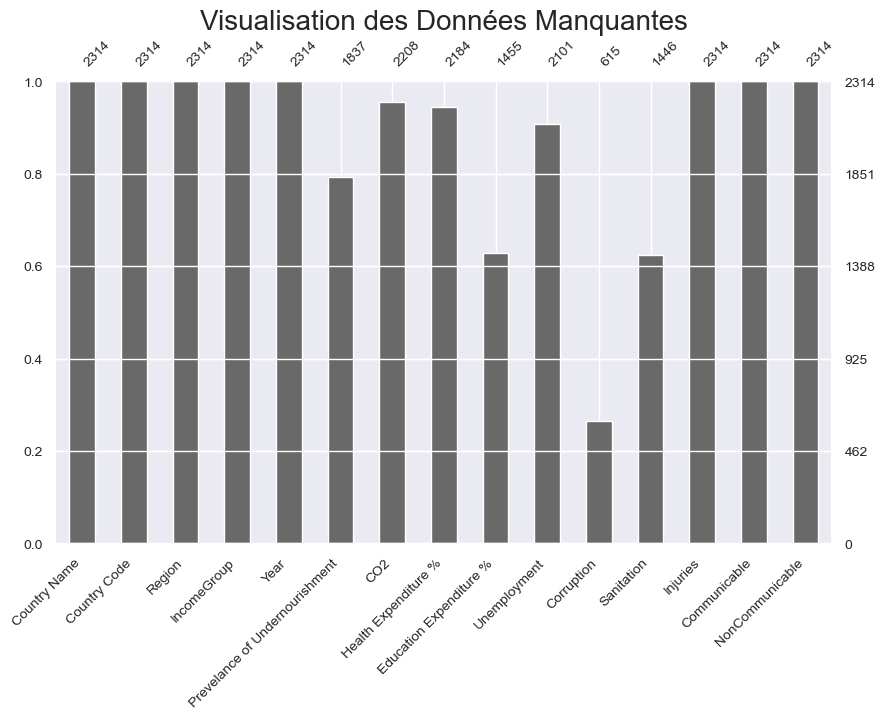

In [14]:


msno.bar(X_train, figsize=(10,6), fontsize=10)

# Ajouter un titre et des labels pour les axes
plt.title('Visualisation des Données Manquantes', fontsize=20)


 

<Axes: >

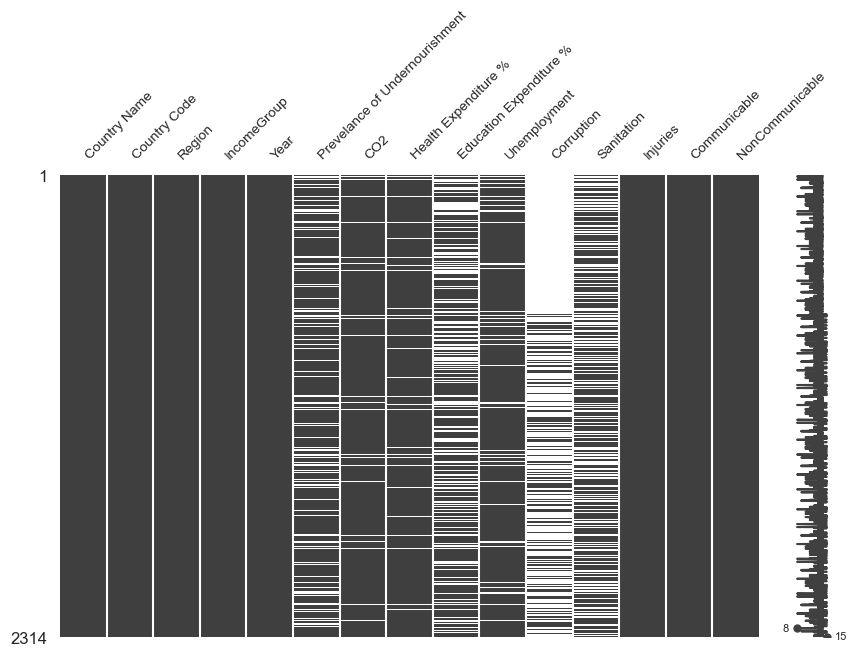

In [15]:
msno.matrix(X_train,figsize=(10,6), fontsize=10)

<h3 style="color: navy;">Analyse des statistiques descriptives</h3>

In [16]:
# Obtenir un résumé statistique
X_train.describe()

Year  Prevelance of Undernourishment  \
count                           2314                     1837.000000   
mean   2007-02-27 14:39:55.851339776                       11.274905   
min              2001-01-01 00:00:00                        2.500000   
25%              2004-01-01 00:00:00                        2.500000   
50%              2007-01-01 00:00:00                        6.700000   
75%              2010-01-01 00:00:00                       16.000000   
max              2014-01-01 00:00:00                       70.900000   
std                              NaN                       11.677776   

                CO2  Health Expenditure %  Education Expenditure %  \
count  2.208000e+03           2184.000000              1455.000000   
mean   1.518102e+05              6.229764                 4.551098   
min    1.000000e+01              1.263576                 0.850320   
25%    1.770000e+03              4.093316                 3.077935   
50%    9.610000e+03              5.765232                 4.325730   
75%    5.760000e+04              8.051207                 5.532170   
max    1.000667e+07             24.230680                23.270000   
std    7.324616e+05              2.784906                 2.125223   

       Unemployment  Corruption   Sanitation      Injuries  Communicable  \
count   2101.000000  615.000000  1446.000000  2.314000e+03  2.314000e+03   
mean       8.079054    2.870732    50.989346  1.340920e+06  5.013170e+06   
min        0.250000    1.000000     2.377647  4.304900e+02  3.301600e+02   
25%        3.800000    2.500000    23.247225  6.307081e+04  5.903560e+04   
50%        6.180000    3.000000    47.736885  2.452339e+05  3.366439e+05   
75%       10.280000    3.500000    78.838959  8.371313e+05  2.956270e+06   
max       37.250000    4.500000   100.000004  5.563676e+07  2.685646e+08   
std        6.436255    0.621904    29.971252  5.357785e+06  1.980228e+07   

       NonCommunicable  
count     2.314000e+03  
mean      7.148819e+06  
min       2.575110e+03  
25%       3.131134e+05  
50%       1.332145e+06  
75%       3.773052e+06  
max       3.019336e+08  
std       2.850057e+07

<h3 style="color: navy;">Analyse des variables redondantes</h3>

    On remarque que plusieurs colonnes sont similaires entre eux, examinons les afin de voir si on peux en eliminer une ou plusieurs

In [17]:
# Calculer le nombre de variables uniques por "Country Code " et "Country Name"
nombre_de_pays =X_train["Country Name"].nunique()
print(f"Nombre de pays est  {nombre_de_pays}")
nombre_de_codes = X_train["Country Code"].nunique()
print(f"Nombre de code pays est  {nombre_de_codes}")

Nombre de pays est  174
Nombre de code pays est  174


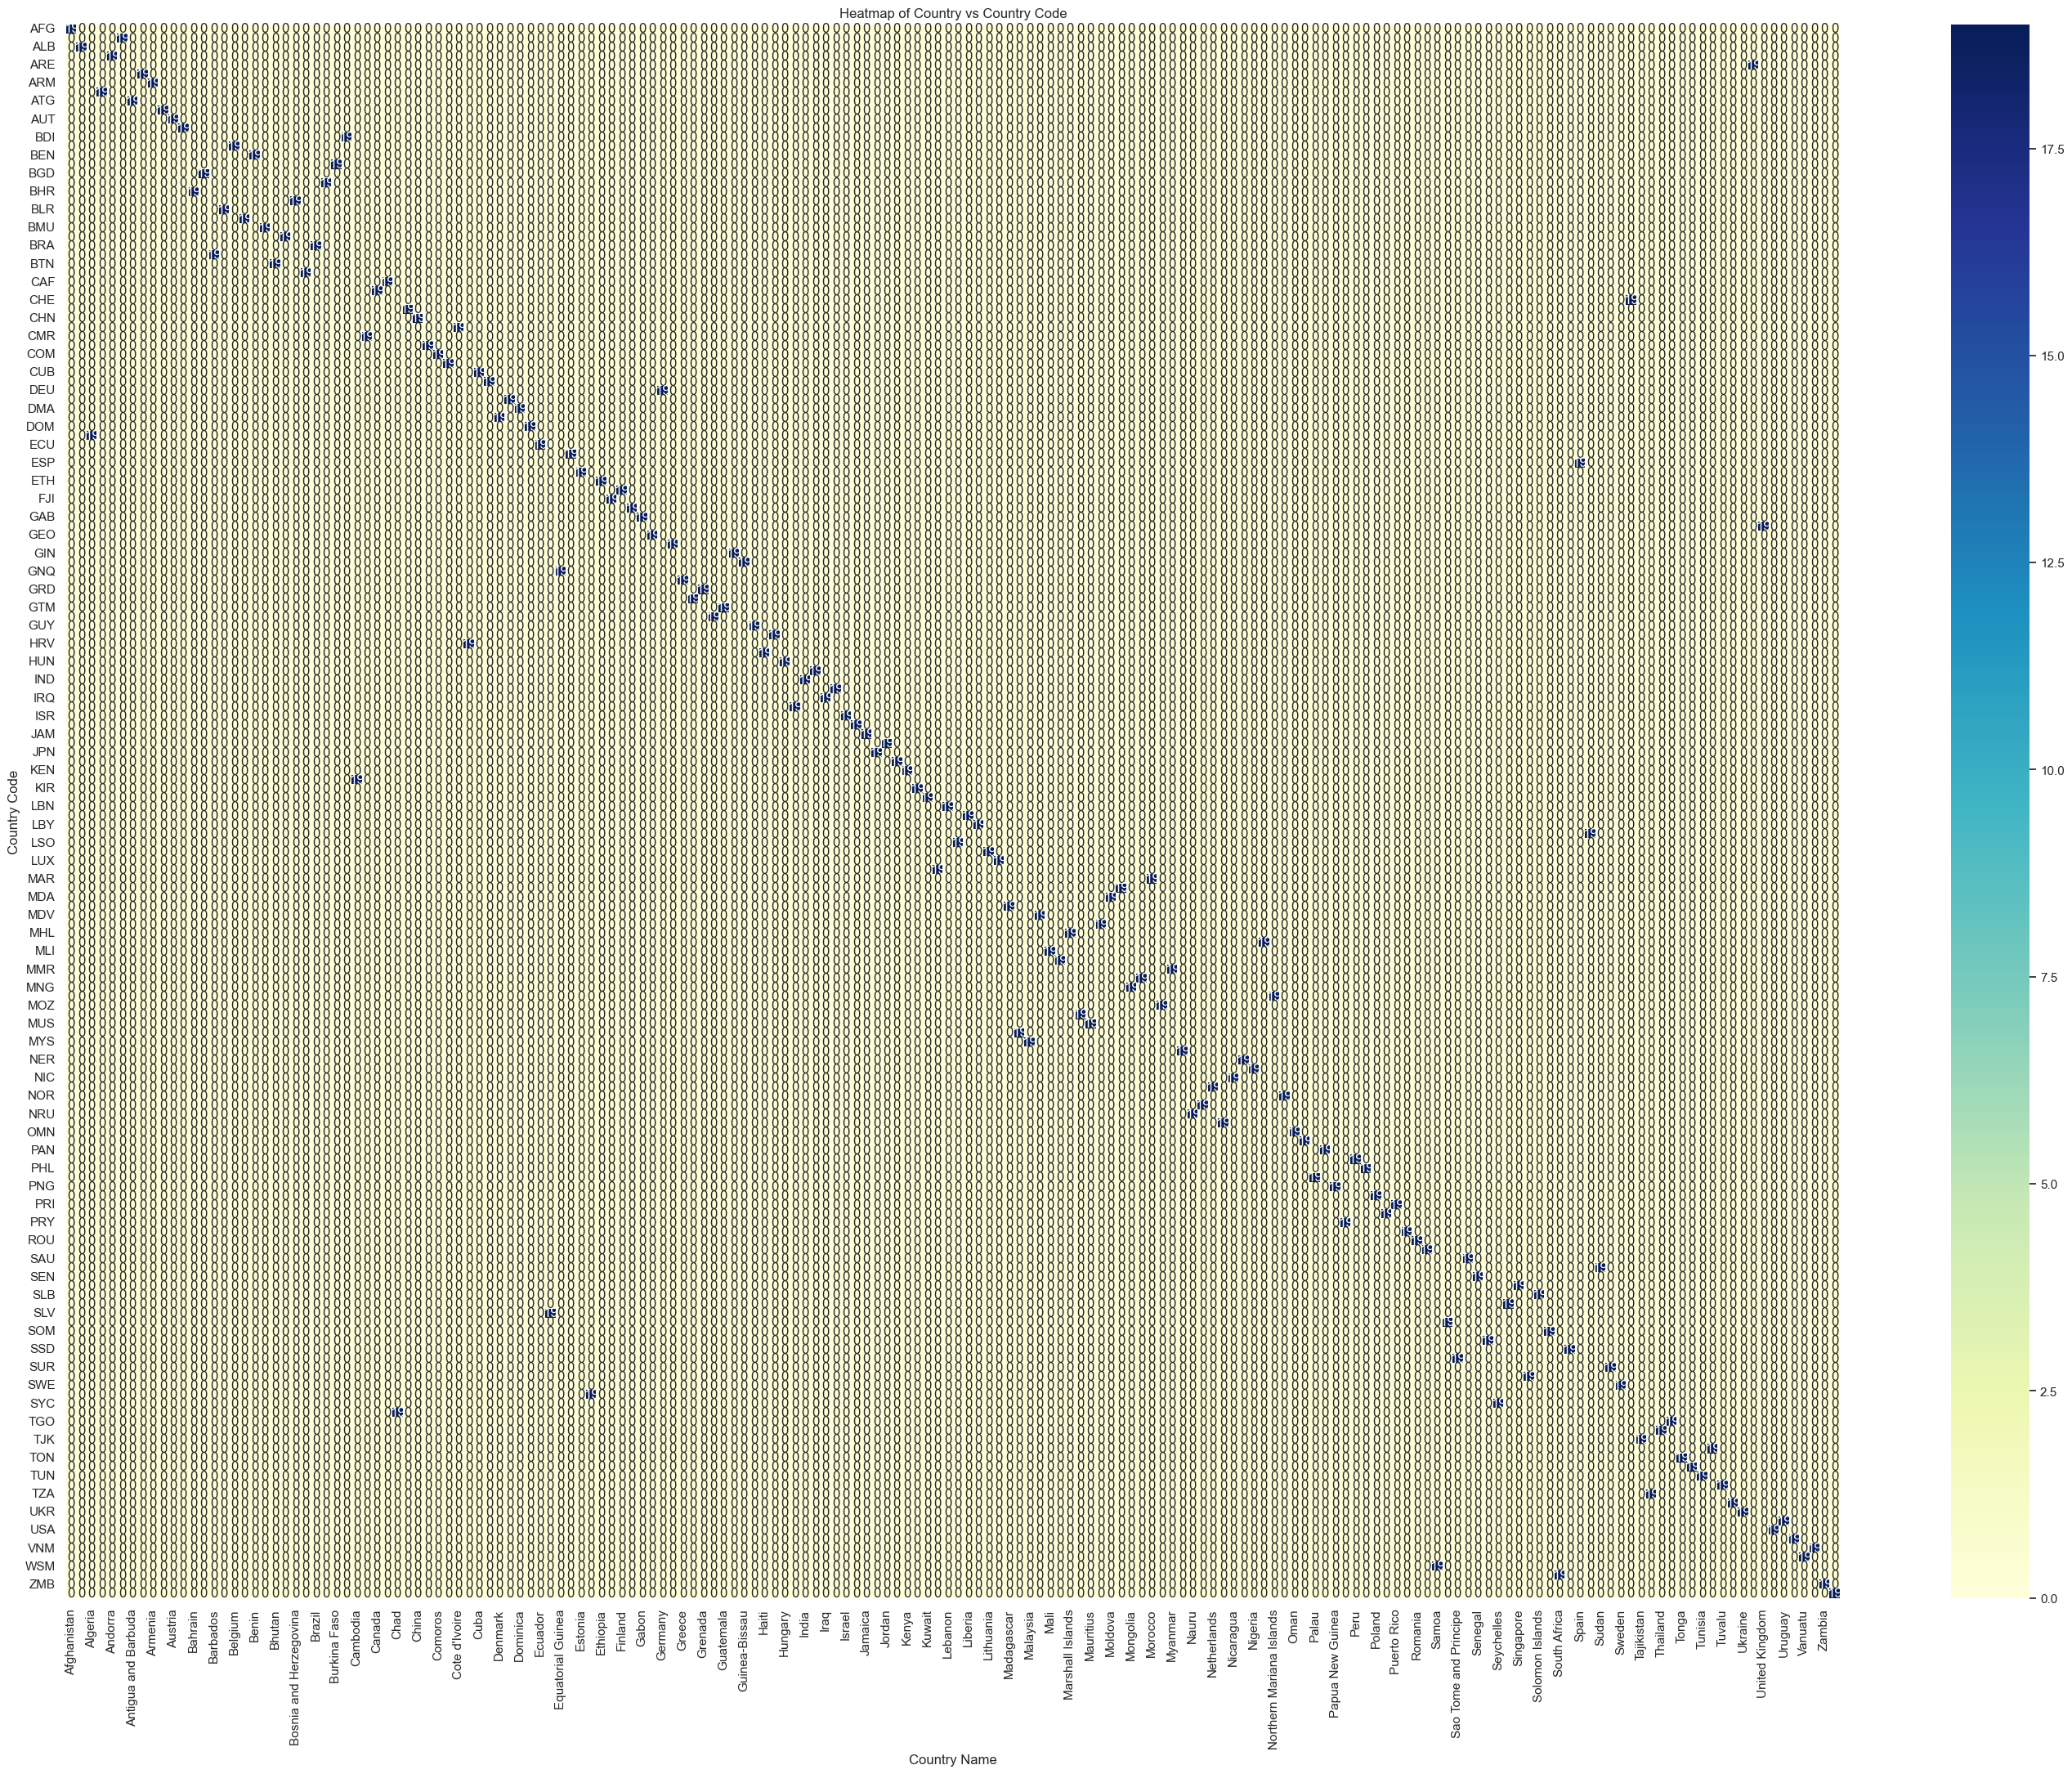

In [18]:
# Créer le tableau de contingence
table = pd.crosstab(df['Country Code'], df['Country Name'])

# Utiliser un heatmap pour visualiser le tableau de contingence
plt.figure(figsize=(35, 25)) 
sns.heatmap(table, annot=True, fmt="d", cmap="YlGnBu")  
plt.title('Heatmap of Country vs Country Code')
plt.show()


In [19]:
""" D'apres ce Heatmap  Country Code et Country Name sont deux variables identiques et pour eviter la redondance on va opter pour la suppression de Country code et garder Country Name plus tard dans la partie d'entrainement du modele."""

" D'apres ce Heatmap  Country Code et Country Name sont deux variables identiques et pour eviter la redondance on va opter pour la suppression de Country code et garder Country Name plus tard dans la partie d'entrainement du modele."

<h3 style="color: navy;">Analyse par visualistion pour chaque variable </h3>

In [20]:
num_features = ["Year", "Prevelance of Undernourishment", "CO2", "Health Expenditure %", "Education Expenditure %", "Unemployment", "Corruption", "Sanitation", "Injuries", "Communicable", "NonCommunicable"]
cat_features = ["Country Name", "Region", "IncomeGroup"]

In [21]:
def plot_distribution_donnees_numeriques(dataframe, features):
   
    # Définir le nombre de subplots nécessaires en fonction du nombre de features
    num_plots = len(features)
    num_cols = 4  # Nombre de graphiques cote a cote dans la grille de subplots
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calcul du nombre de lignes nécessaires

    plt.figure(figsize=(15, 5 * num_rows))  # taille  de la figure

    for i, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, i + 1)  #  pour chaque feature on créé un subplot
        sns.histplot(dataframe[feature], kde=True, element='step', color='blue')
        plt.title(f'Distribution de {feature}')  # titre
        plt.xlabel(f'Valeurs de {feature}')  # Étiquette pour l'axe des X
        plt.ylabel('''Nombre d'observations''')  # Étiquette pour l'axe des Y

    plt.tight_layout()
    plt.show()

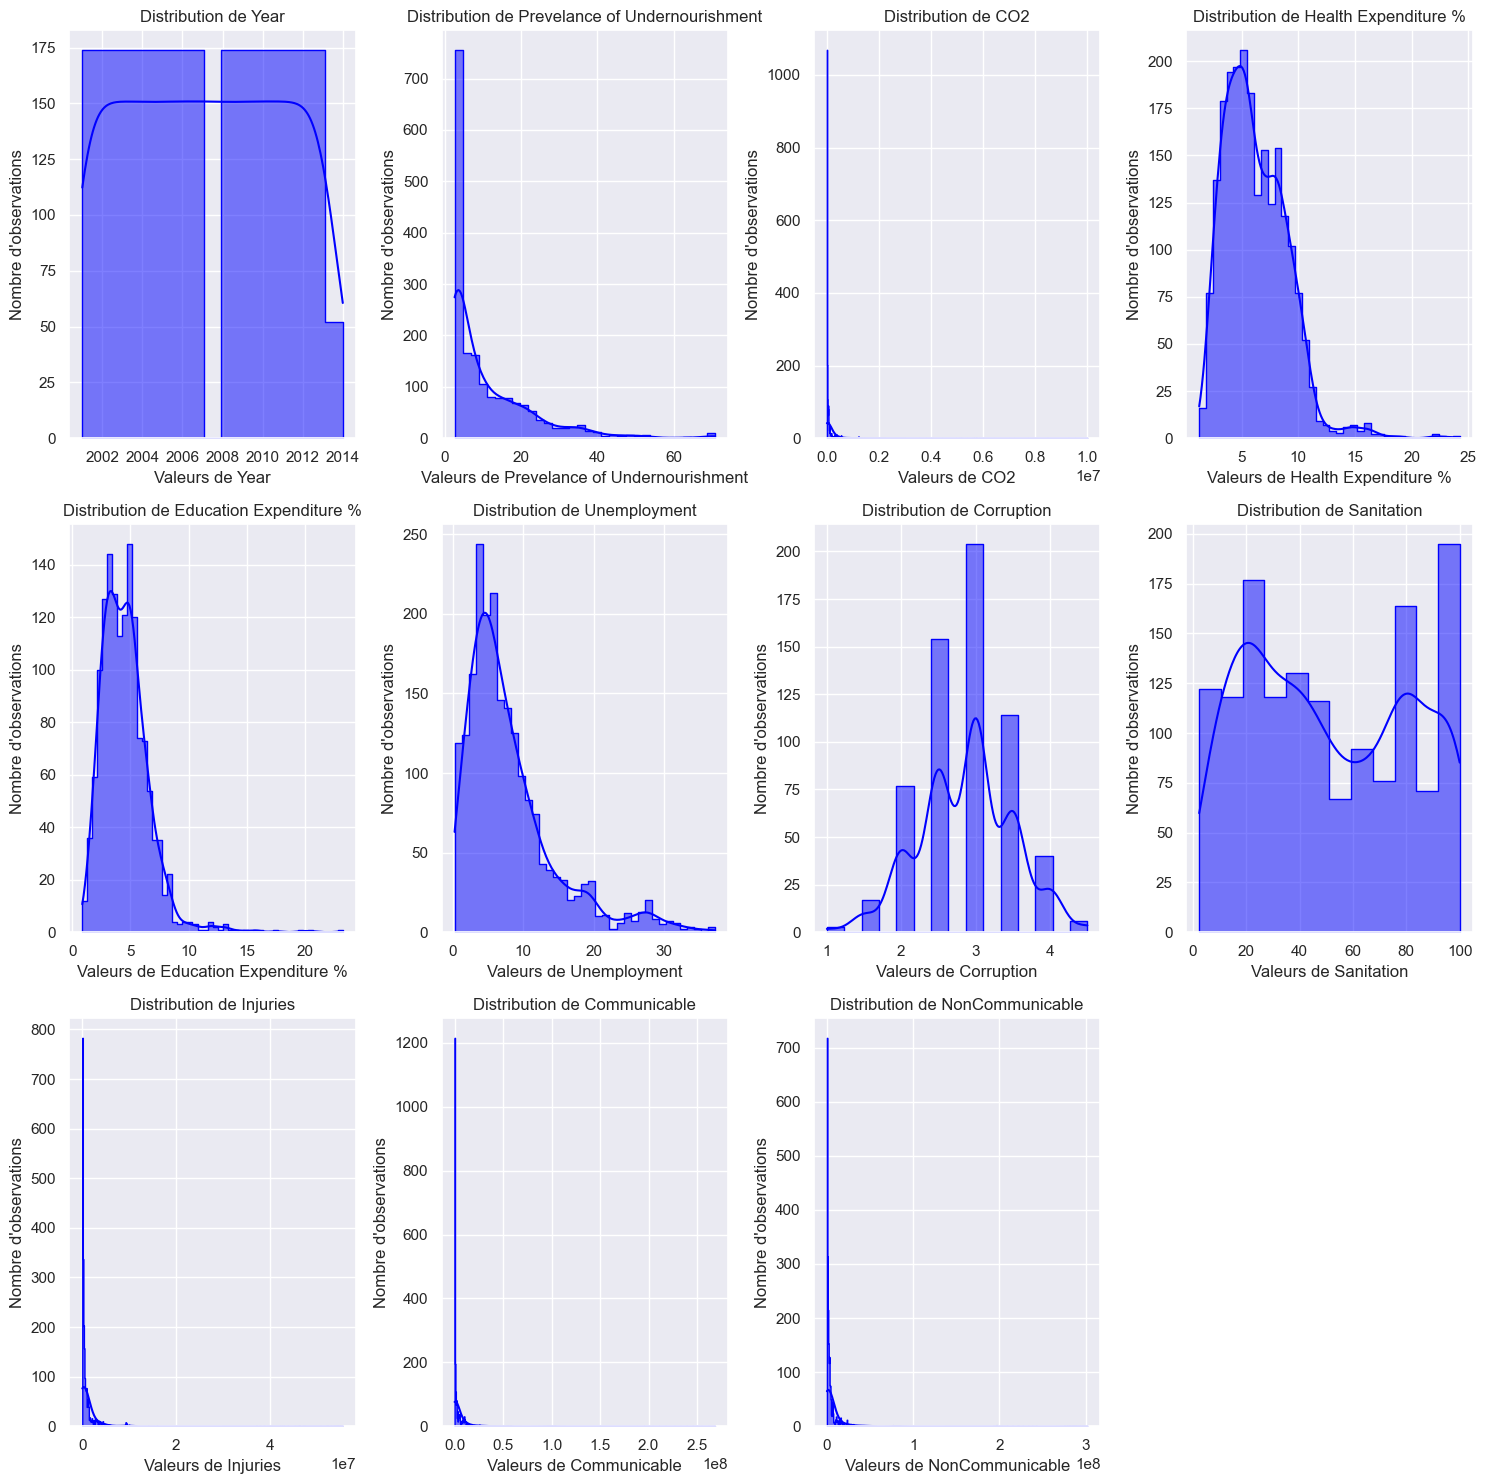

In [22]:
# Affichier la distribution des colonnes contenant des données numériques
plot_distribution_donnees_numeriques(X_train, num_features)

C:\Users\mikae\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


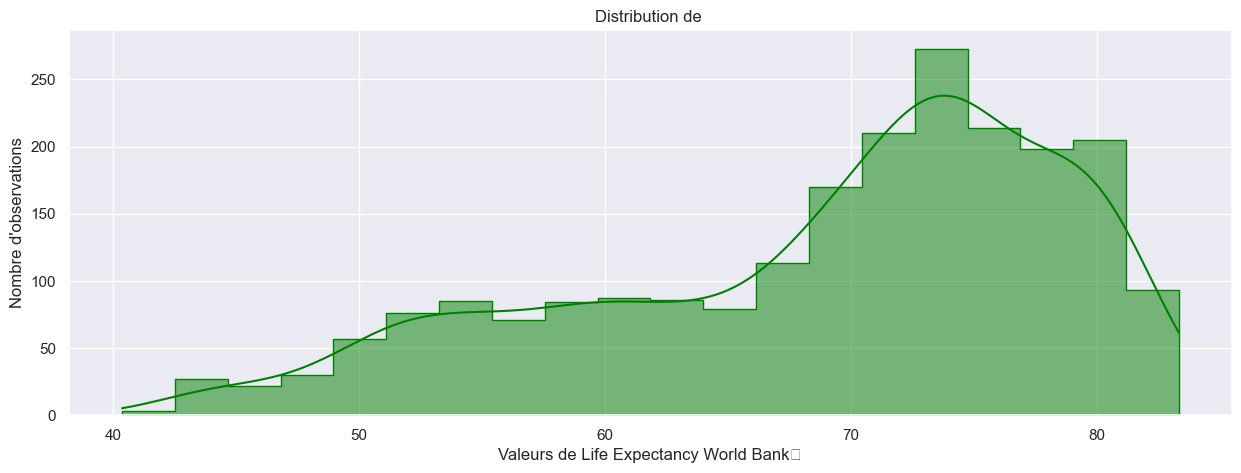

In [23]:
plt.figure(figsize=(15, 5 ))
sns.histplot(y_train, kde=True, element='step', color='green')
plt.title(f'Distribution de ') 
plt.xlabel(f'Valeurs de Life Expectancy World Bank	')  
plt.ylabel('''Nombre d'observations''')  

plt.show()

### Visualiser les regions du monde en fonction de l'espérance de vie et des années

C:\Users\mikae\AppData\Local\Temp\ipykernel_19632\1213645874.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


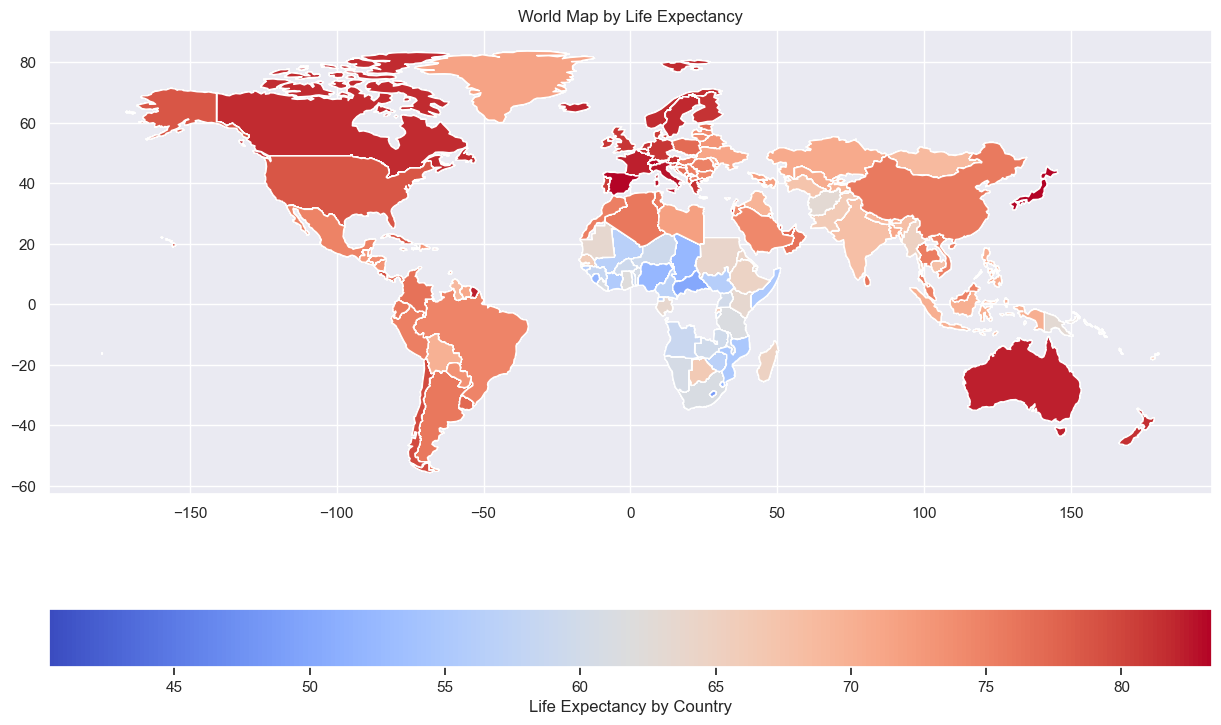

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt


y_train_for_map= pd.DataFrame(y_train, columns=["Life Expectancy World Bank"])
y_train_for_map = y_train_for_map['Life Expectancy World Bank'].fillna(y_train_for_map['Life Expectancy World Bank'].mean())
y_train_for_map= pd.DataFrame(y_train_for_map, columns=["Life Expectancy World Bank"])

y_train_for_map["Country Code"] = X_train["Country Code"]

# Fusionnez les données géographiques avec les données d'espérance de vie
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.merge(y_train_for_map, left_on='iso_a3', right_on='Country Code')

# Tracer la carte en fonction de la colonne 'Life Expectancy'
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Life Expectancy World Bank', ax=ax, 
                 cmap='coolwarm',  # Utiliser une colormap qui représente bien les données
                 legend=True, 
                 legend_kwds={'label': "Life Expectancy by Country",
                              'orientation': "horizontal"})
ax.set_title('World Map by Life Expectancy')
plt.show()


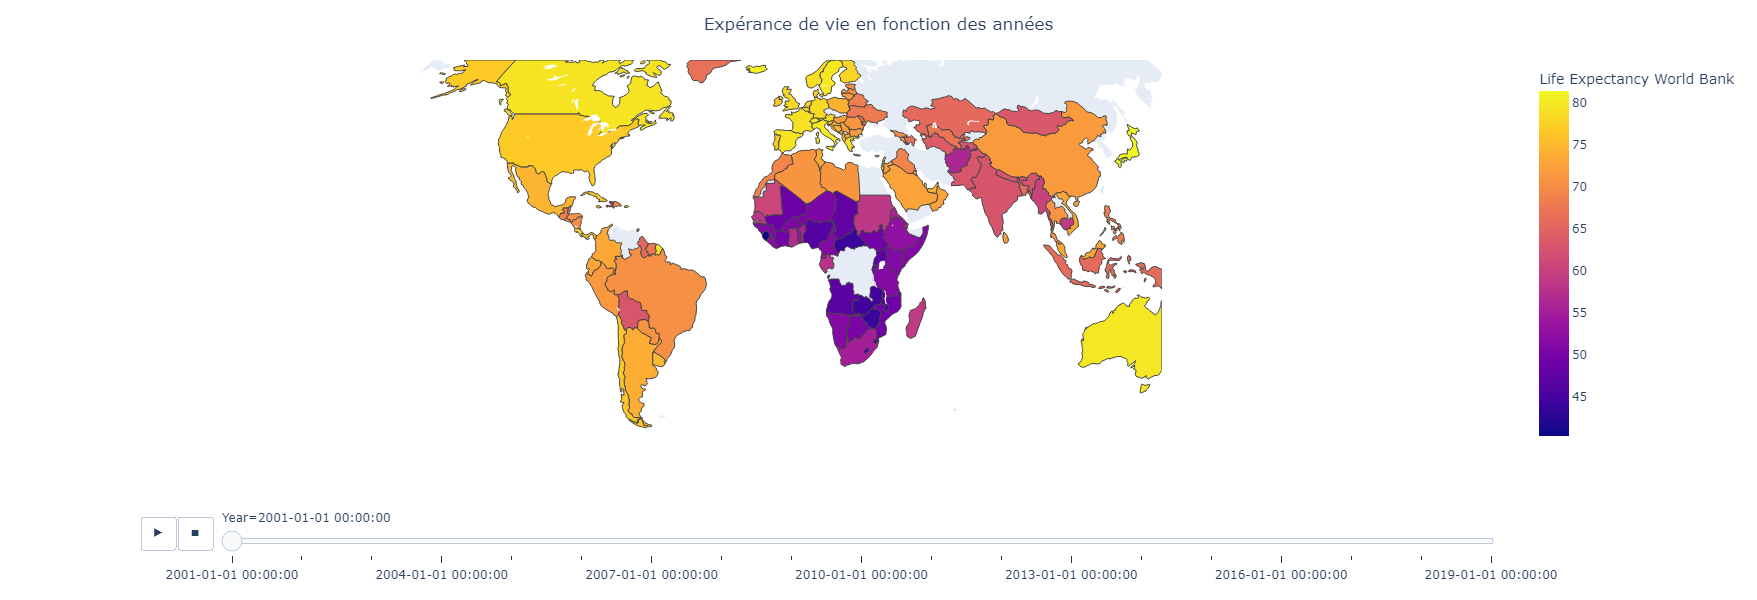

In [25]:
import plotly.express as px

fig = px.choropleth(df,
                    locations="Country Code",  # DataFrame column with country codes
                    color="Life Expectancy World Bank",  # DataFrame column with data to color-code
                    hover_name="Country Code",  # column to add to hover information
                    animation_frame="Year",  # this creates a slider for different years
                    color_continuous_scale=px.colors.sequential.Plasma,  # color scale
                    projection="natural earth")  # type of map projection

# Update the layout to increase the size
fig.update_layout(
    title_text = 'Expérance de vie en fonction des années',
    title_x = 0.5,  # center the title
    width=1000,  # width of the figure in pixels
    height=600,  # height of the figure in pixels
    geo=dict(
        showframe=False,  # removes the frame around the map
        showcoastlines=False,  # removes coastlines
    )
)

fig.show()


<h3 style="color: navy;">Recherche des données aberrantes </h3>

In [26]:
# Fonction de creation de boxplot pour chaque donnée numérique
def plot_box_donnees_numeriques(df: pd.DataFrame, features):
    dfnbr = [f for f in df.columns if df.dtypes[f] != 'object']
    f = pd.melt(df, value_vars=features)
    g = sns.FacetGrid(f, col="variable", col_wrap=5, sharex=False, sharey=False, height=5)
    g.map(sns.boxplot, "value")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle("Distribution des Attributs Numériques")
    plt.show()

C:\Users\mikae\AppData\Local\Temp\ipykernel_19632\3846949940.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mikae\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\mikae\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



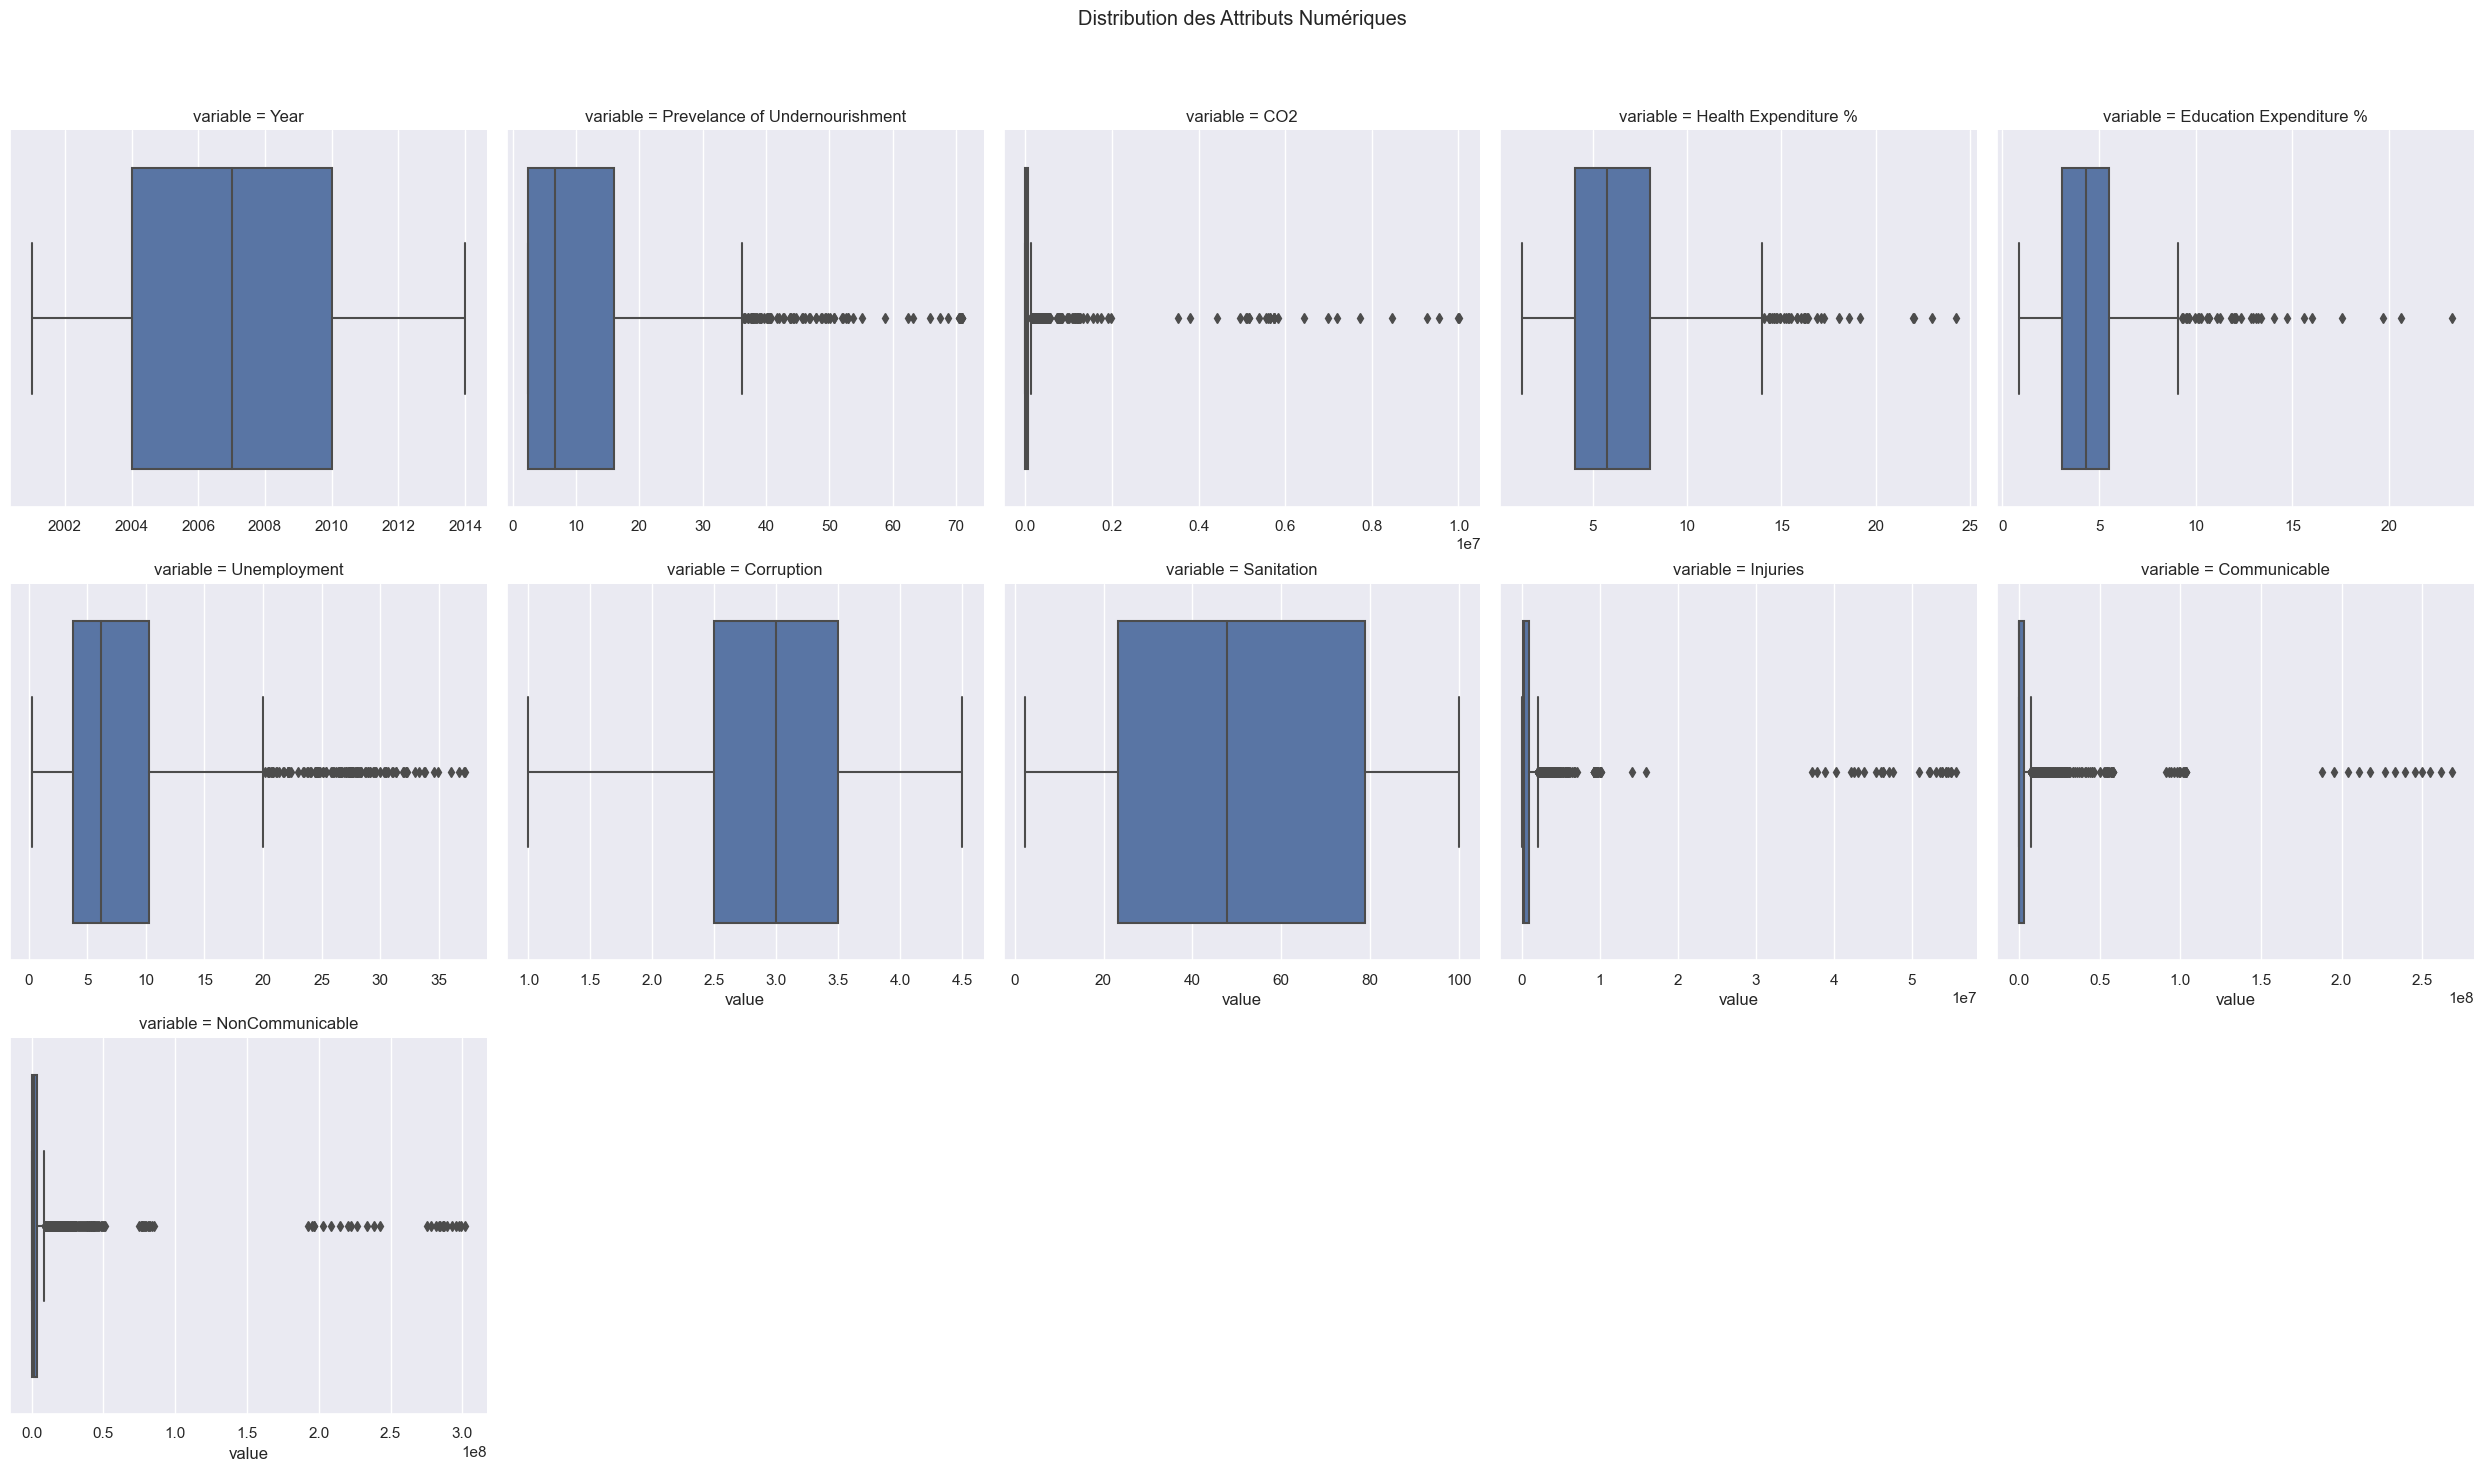

In [27]:
# Afficher les graphiques box plot afin d'identifier les données abéranttes

X_train['Year'] = X_train['Year'].dt.year # transformer la variable Year en integer afin de pouvoir la visualiser 
plot_box_donnees_numeriques(X_train, num_features)

In [28]:
def proportion_valeurs_abberantes(df):
    outlier_info = {}
    for column in df.select_dtypes(include=['float64', 'int64']): 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        total_count = df[column].count()
        outlier_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].count()
        outlier_percentage = (outlier_count / total_count) * 100
        outlier_info[column] = outlier_percentage
    return outlier_info


In [29]:
percentag_abberantes = proportion_valeurs_abberantes(X_train)
print("Pourcentage des valeurs abbéranres pour chaque variable:")
for variable, percentage in percentag_abberantes.items():
    print(f"{variable}: {percentage:.2f}%")


Pourcentage des valeurs abbéranres pour chaque variable:
Prevelance of Undernourishment: 4.25%
CO2: 14.36%
Health Expenditure %: 1.60%
Education Expenditure %: 2.34%
Unemployment: 5.66%
Corruption: 0.00%
Sanitation: 0.00%
Injuries: 11.97%
Communicable: 15.77%
NonCommunicable: 13.22%


In [30]:
""" Les visualisations en boite a moustache montre la présence de valeurs abberantes pour toutes les variables sauf les variables suivantes: "Year", "Corruption", "Sanitation".

    Plus loin avant de modéliser nous allons standardiser les données avec la librarrie Robustscaler qui aide a réduire l'effet des valeurs abbérantes 
    
    """

' Les visualisations en boite a moustache montre la présence de valeurs abberantes pour toutes les variables sauf les variables suivantes: "Year", "Corruption", "Sanitation".\n\n    Plus loin avant de modéliser nous allons standardiser les données avec la librarrie Robustscaler qui aide a réduire l\'effet des valeurs abbérantes \n    \n    '

<h3 style="color: navy;">Traitement des données aberrantes </h3>

     On va standardiser les valeurs pour diminuer l'effet des valeurs abbérantes 

C:\Users\mikae\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



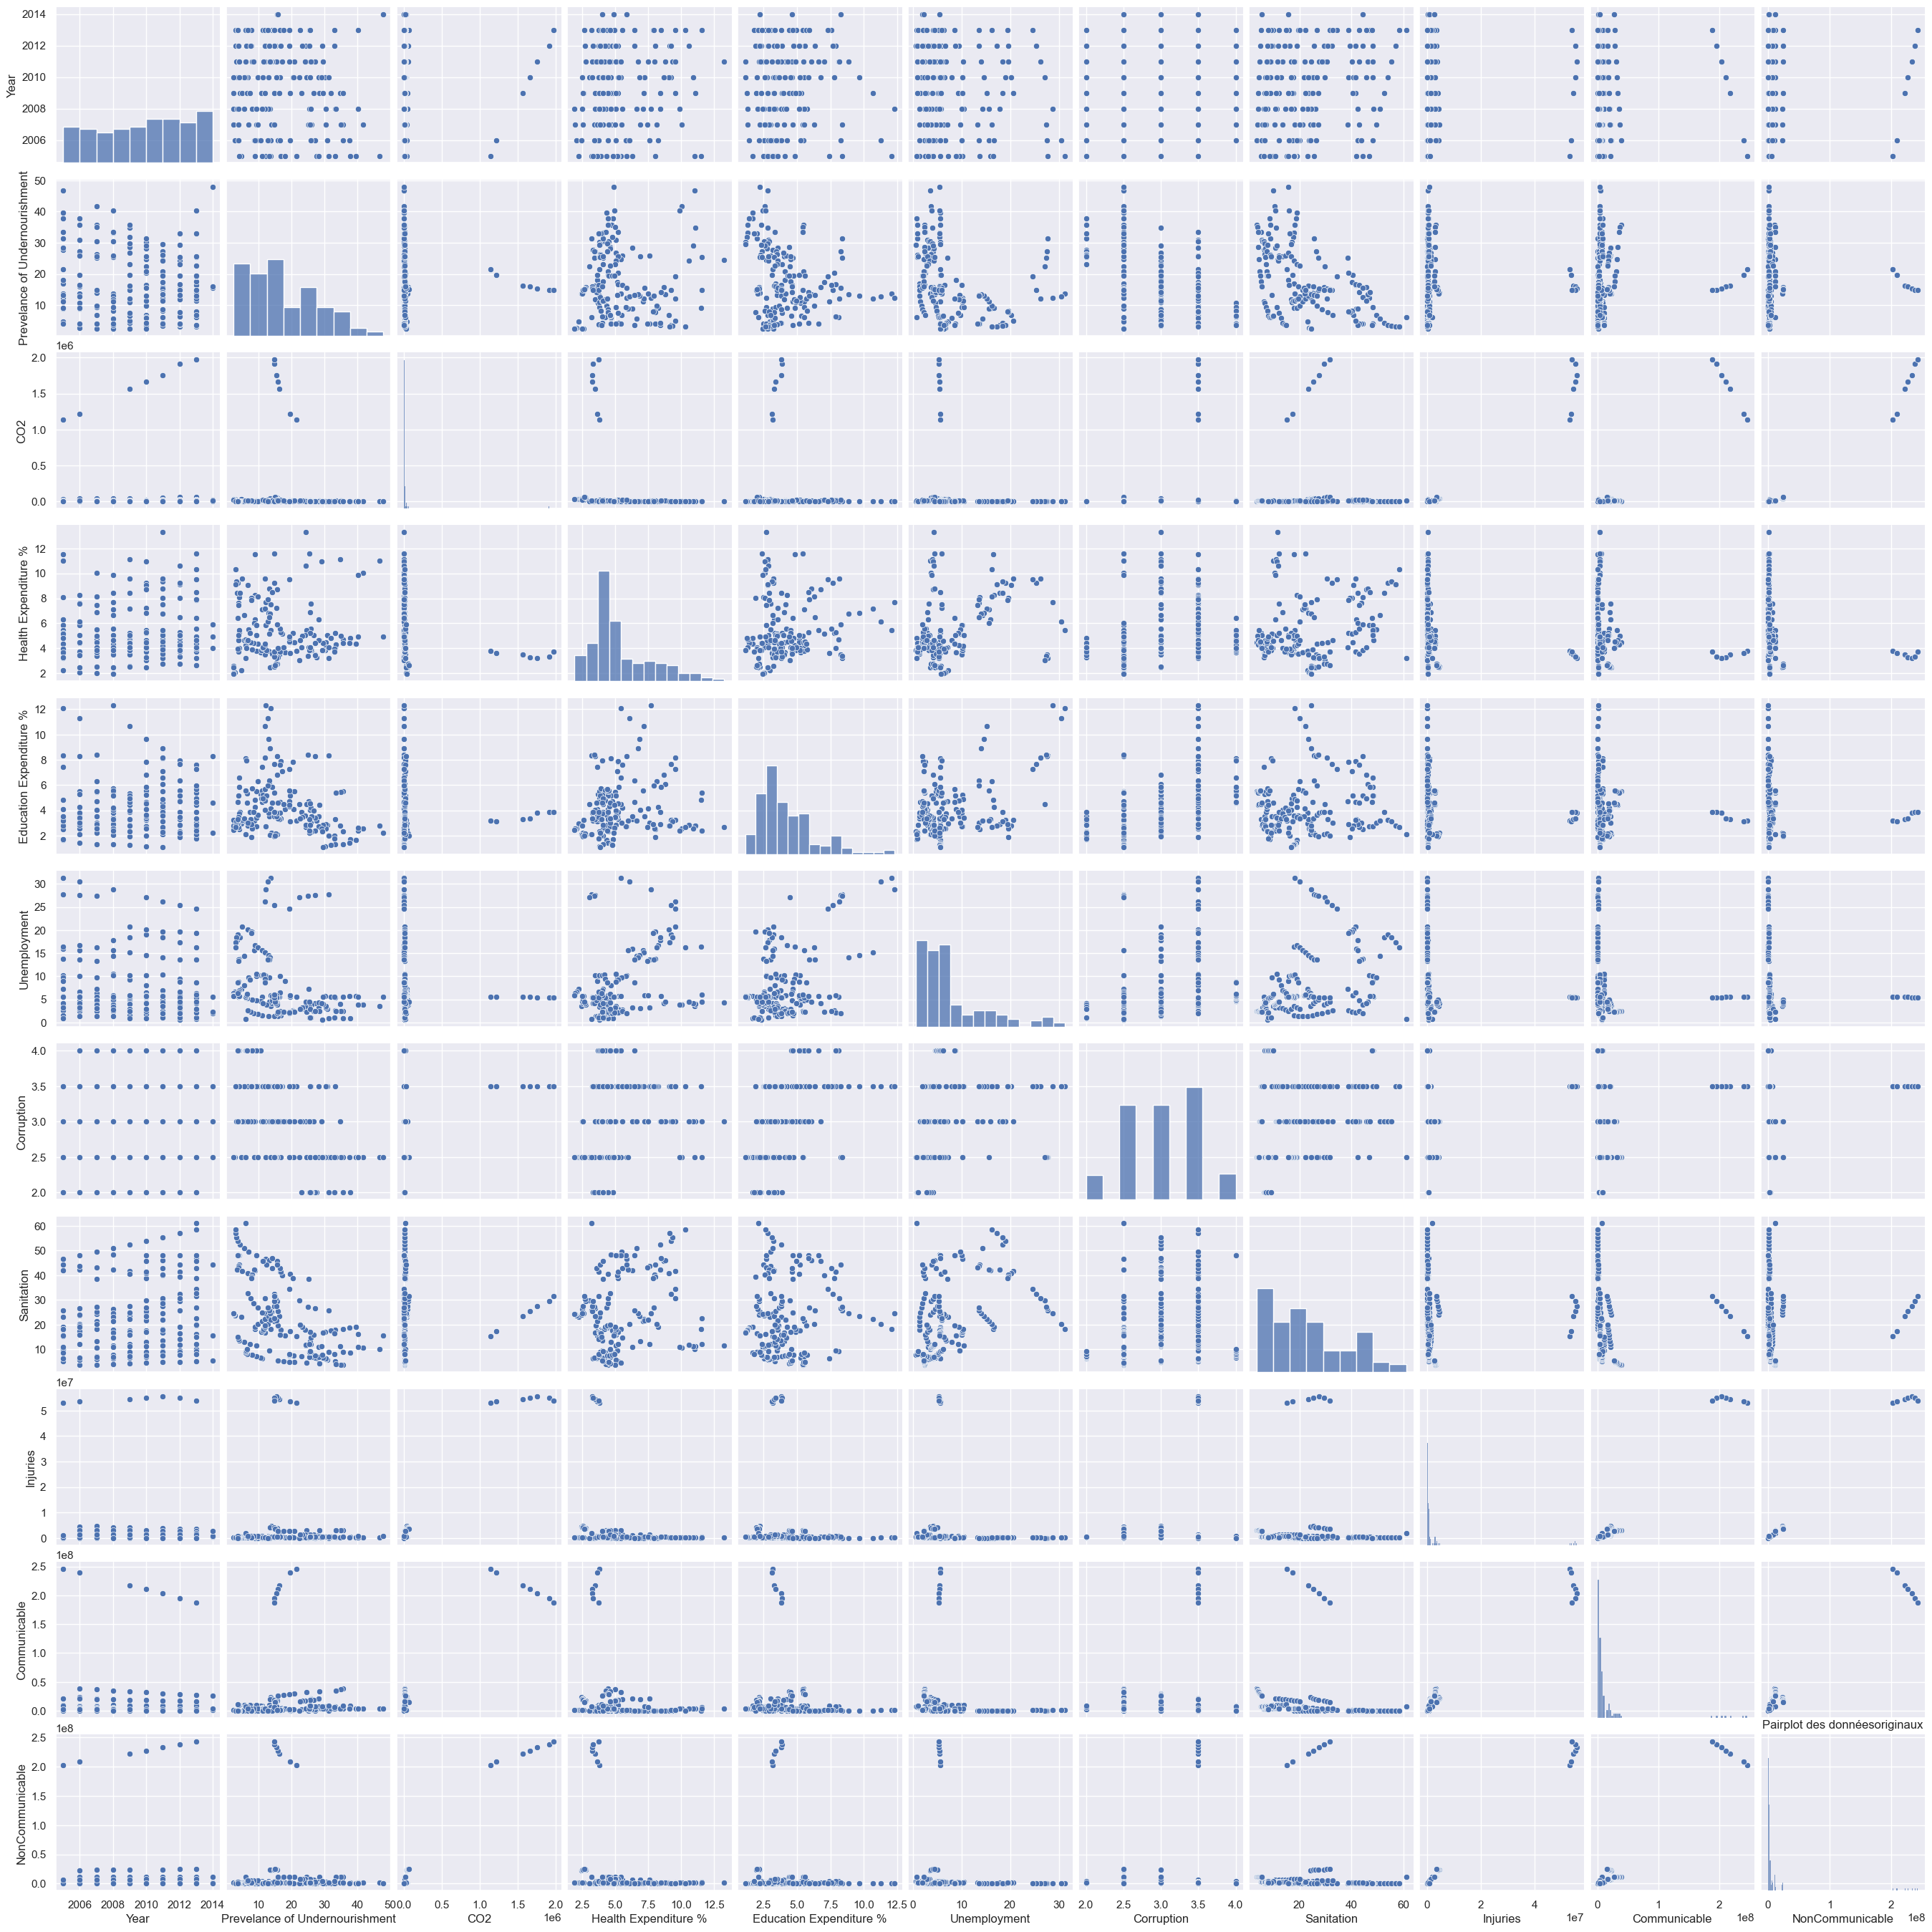

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Original 
sns.pairplot(X_train[num_features].dropna())
plt.title('Pairplot des donnéesoriginaux')
plt.show()



C:\Users\mikae\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



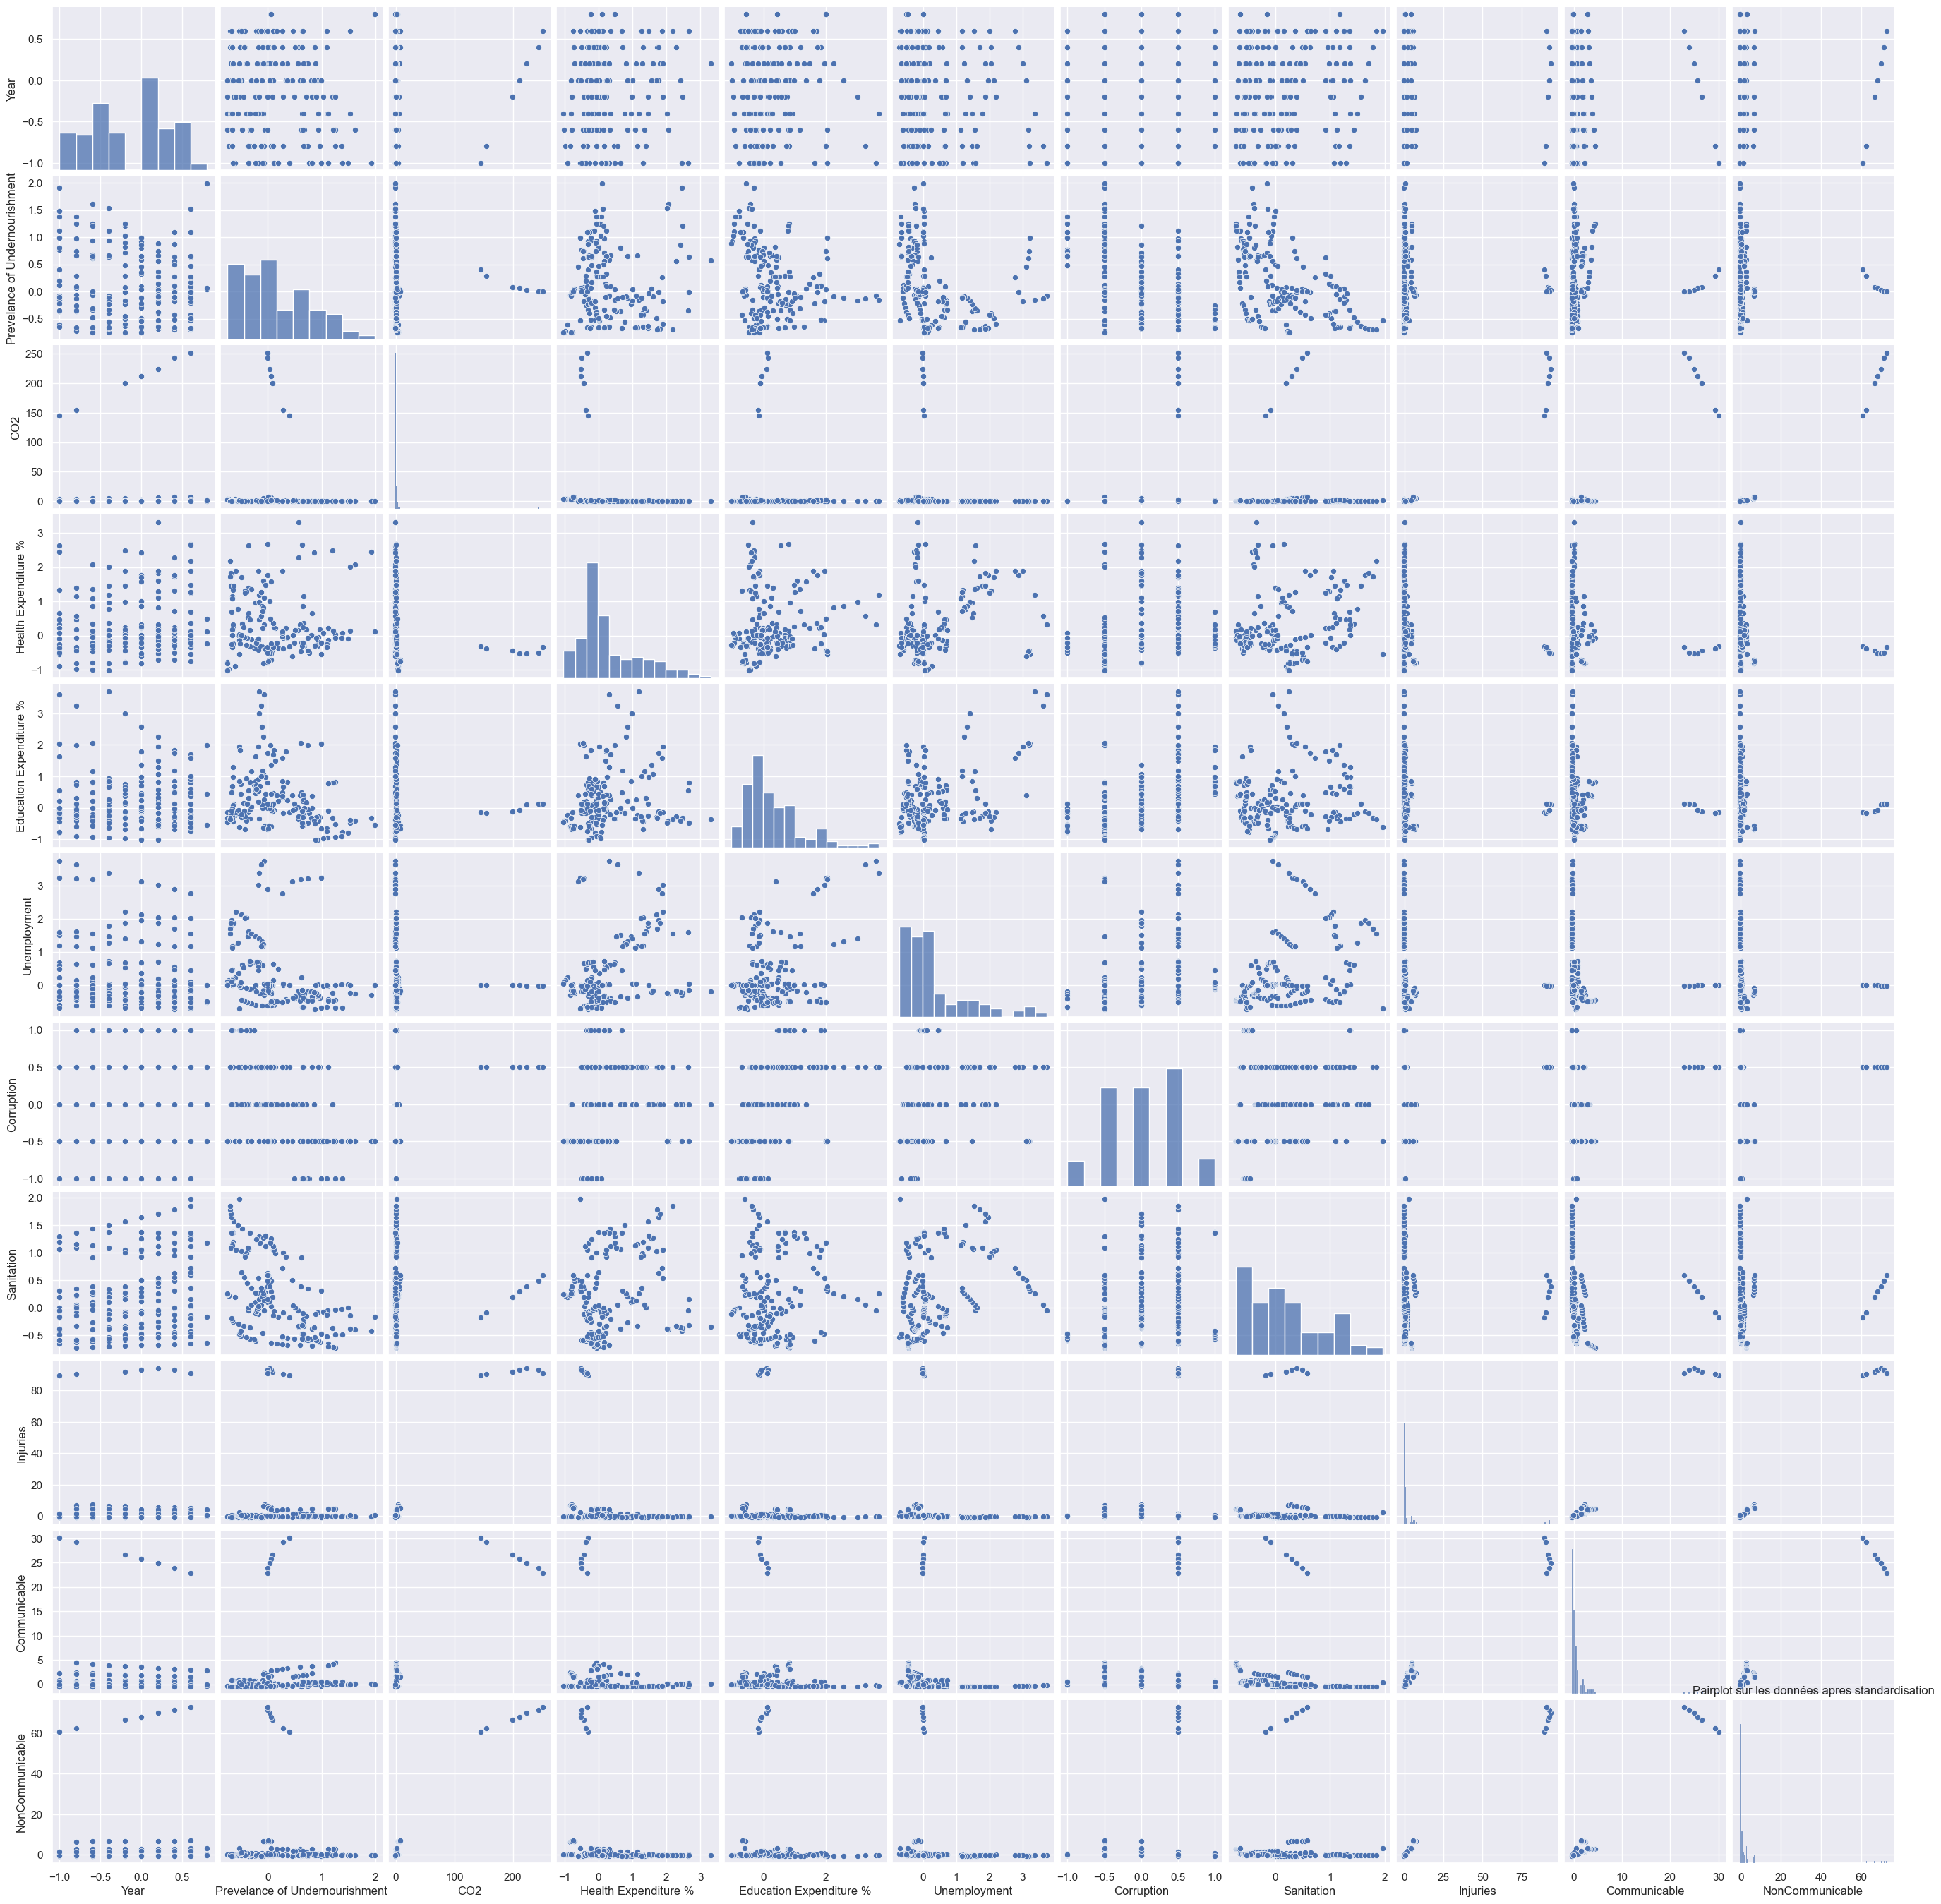

In [34]:
# Applying RobustScaler
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_features].dropna()), columns=X_train[num_features].columns)

# Scaled Data Pairplot
sns.pairplot(df_scaled)
plt.title('Pairplot sur les données apres standardisation')
plt.show()


## Essayons de faire le diagramme en moustache apres la standardisation pour voir si on a moins de données abbérantes

In [35]:
# Fonction de creation de boxplot pour chaque donnée numérique
def plot_box_donnees_numeriques(df: pd.DataFrame, features):
    dfnbr = [f for f in df.columns if df.dtypes[f] != 'object']
    f = pd.melt(df, value_vars=features)
    g = sns.FacetGrid(f, col="variable", col_wrap=5, sharex=False, sharey=False, height=5)
    g.map(sns.boxplot, "value")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle("Distribution des Attributs Numériques")
    plt.show()

C:\Users\mikae\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\mikae\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



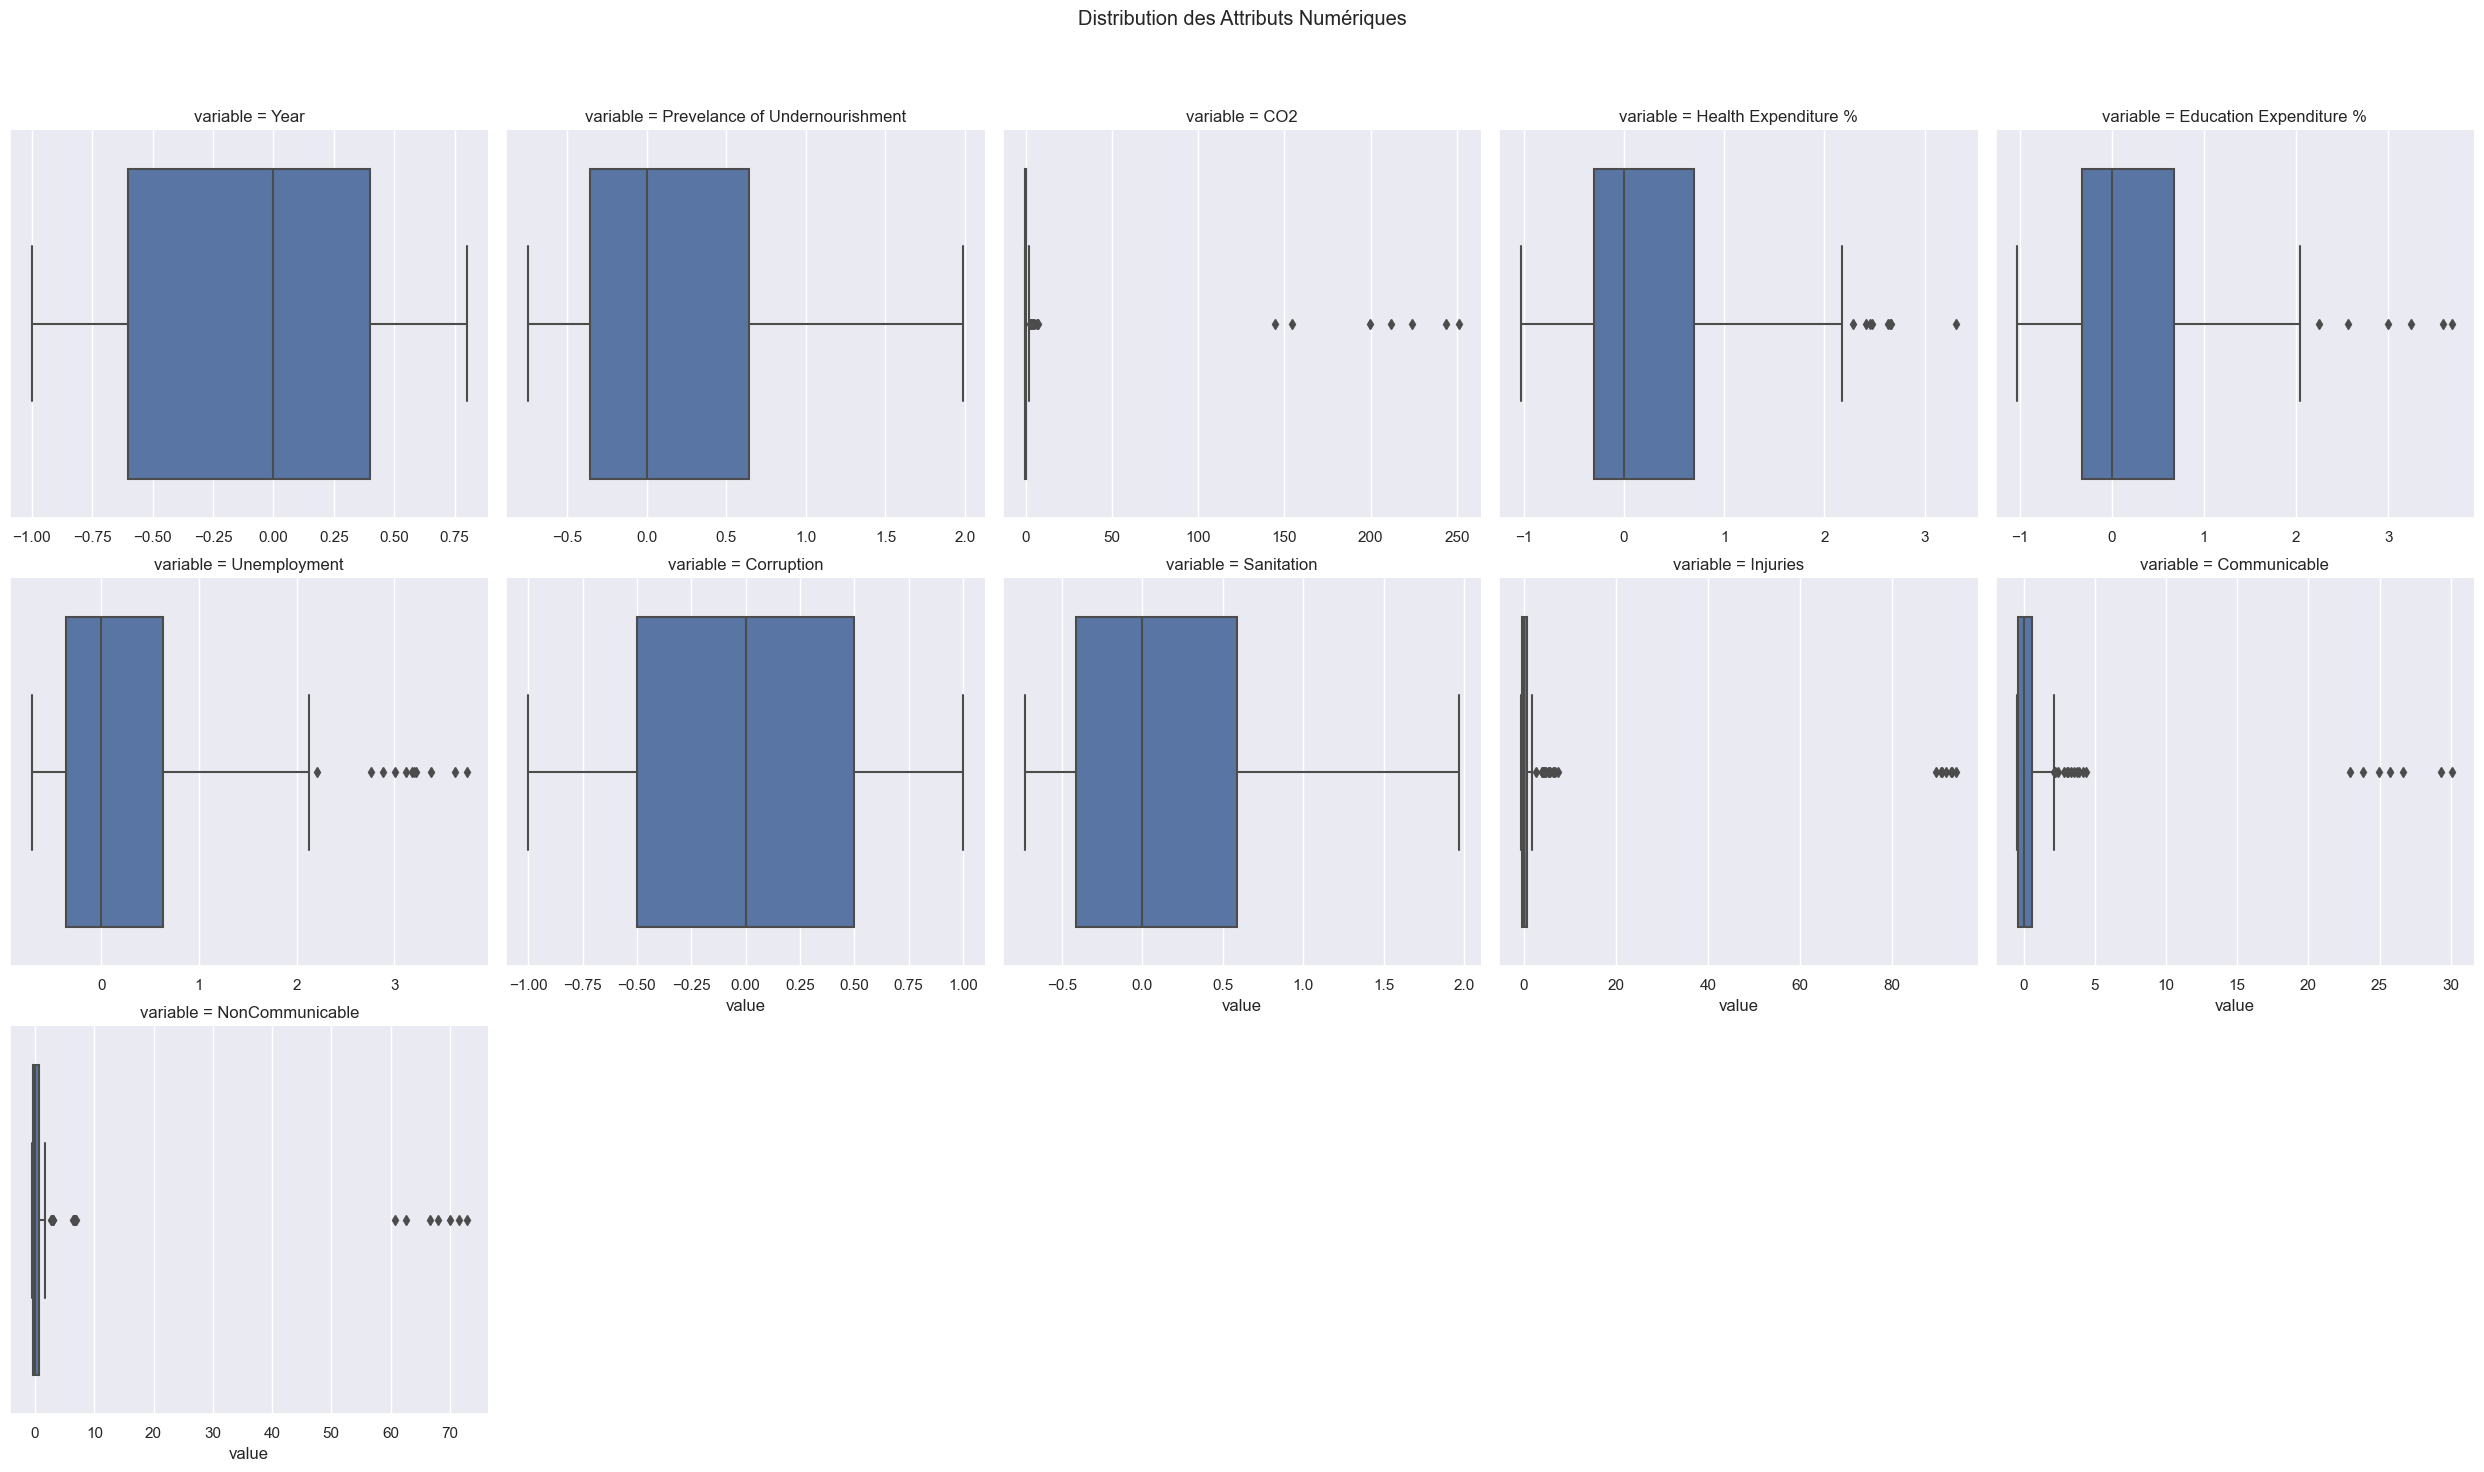

In [36]:
plot_box_donnees_numeriques(df_scaled, num_features)

In [37]:
""" Meme apres avoir standardisé la présence de valeurs abbérantes est forte in va remplacer les valeurs abbérentes extremes avec une méthode de Winsorisation
elle implique de modifier les valeurs qui se trouvent au-delà des percentiles supérieurs et inférieurs spécifiés (par exemple, le 1er et le 99e percentiles) pour qu'elles égalent ces percentiles.
"""

" Meme apres avoir standardisé la présence de valeurs abbérantes est forte in va remplacer les valeurs abbérentes extremes avec une méthode de Winsorisation\nelle implique de modifier les valeurs qui se trouvent au-delà des percentiles supérieurs et inférieurs spécifiés (par exemple, le 1er et le 99e percentiles) pour qu'elles égalent ces percentiles.\n"

In [38]:
from scipy.stats.mstats import winsorize

# Appliquer la méthode Winsorize sur les extrémités supérieures des quartiles des données

df_scaled['CO2'] = winsorize(df_scaled['CO2'], limits=[0, 0.2])  # 20% plafonnement sur le bord supérieur 

df_scaled['Health Expenditure %'] = winsorize(df_scaled['Health Expenditure %'], limits=[0, 0.1]) # 10% plafonnement sur le bord supérieur 

df_scaled['Education Expenditure %'] = winsorize(df_scaled['Education Expenditure %'], limits=[0, 0.05])  # 5% plafonnement sur le bord supérieur 

df_scaled['Sanitation'] = winsorize(df_scaled['Sanitation'], limits=[0, 0.25])  # 25% plafonnement sur le bord supérieur 

df_scaled['Corruption'] = winsorize(df_scaled['Corruption'], limits=[0, 0.05])  # 5% plafonnement sur le bord supérieur 

df_scaled['Unemployment'] = winsorize(df_scaled['Unemployment'], limits=[0, 0.05])  # 5% plafonnement sur le bord supérieur 

df_scaled['Injuries'] = winsorize(df_scaled['Injuries'], limits=[0, 0.2])  # 20% plafonnement sur le bord supérieur 

df_scaled['Communicable'] = winsorize(df_scaled['Communicable'], limits=[0, 0.2])  # 20% plafonnement sur le bord supérieur 

df_scaled['NonCommunicable'] = winsorize(df_scaled['NonCommunicable'], limits=[0, 0.2])  # 20% plafonnement sur le bord supérieur 

C:\Users\mikae\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\mikae\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



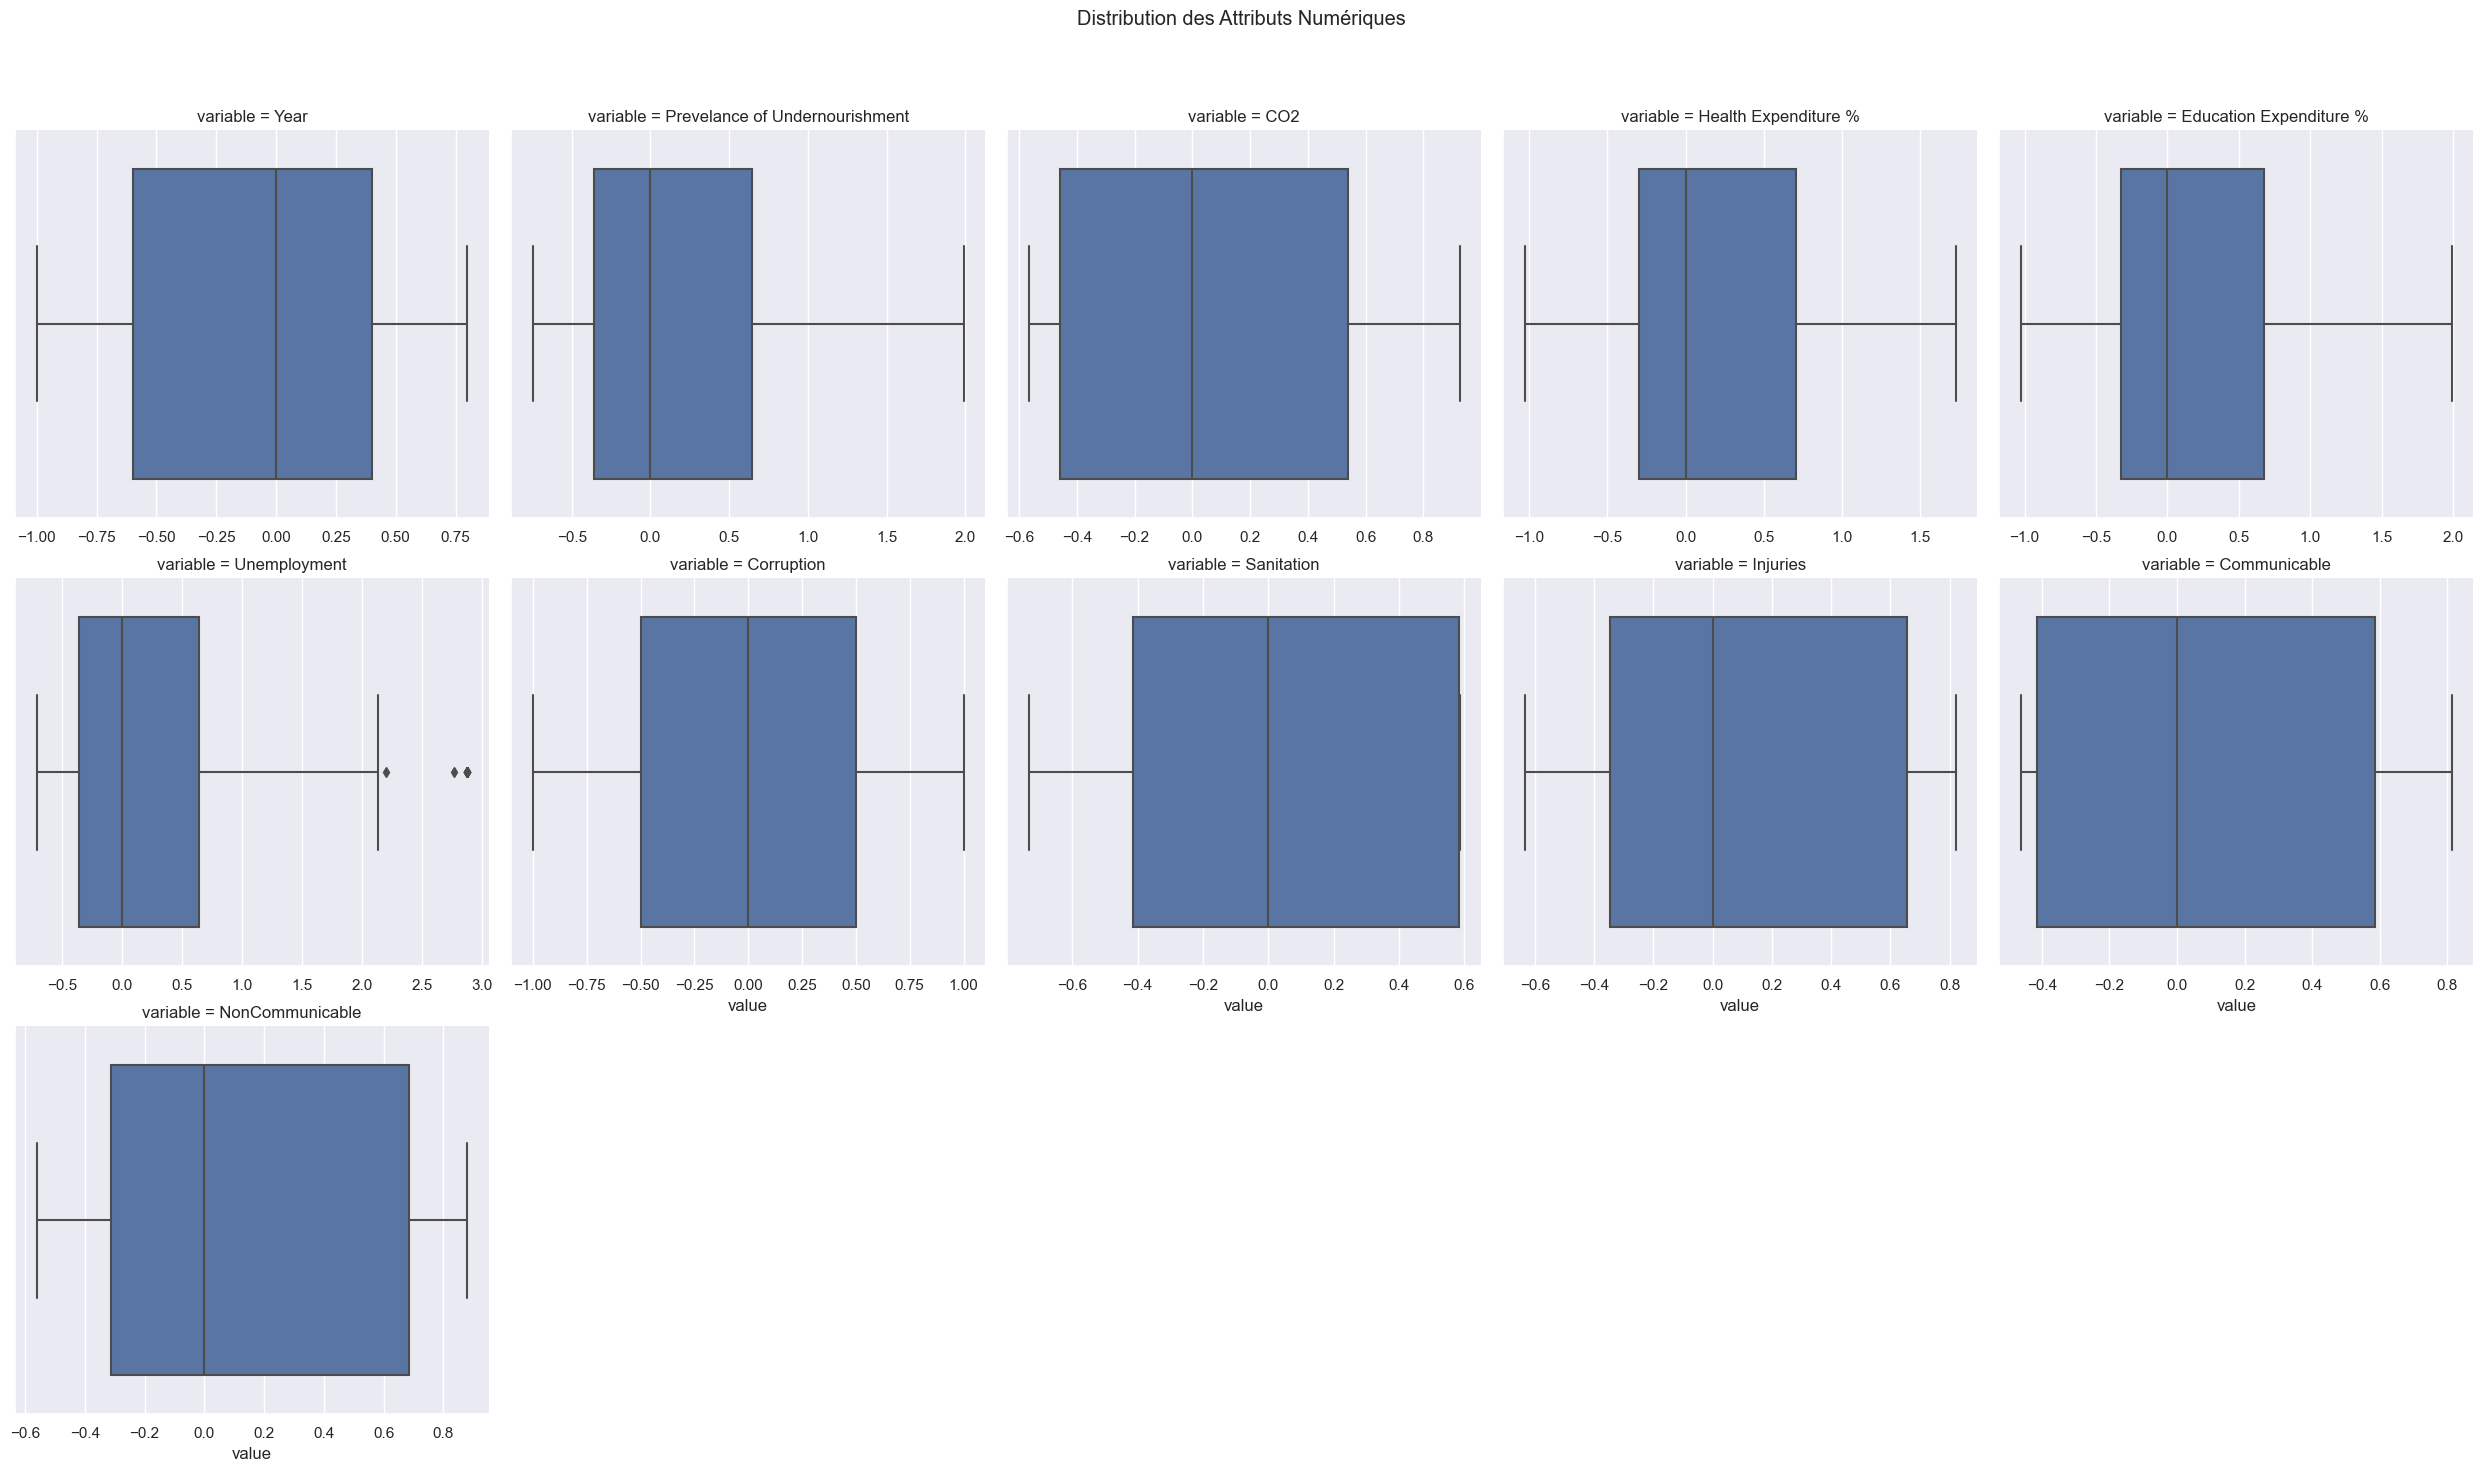

In [39]:
plot_box_donnees_numeriques(df_scaled, num_features)

<h3 style="color: navy;">Analyse des corrélations avant traitement de valeurs abbérantes</h3>

In [41]:
def afficher_heatmap_correlation_spearman(dataframe, features_numeriques):
    # Filtrer pour inclure uniquement les colonnes numériques spécifiées
    data_filtered = dataframe[features_numeriques]

    # Calcul de la matrice de corrélation avec la méthode Spearman
    corr_matrix_spearman = data_filtered.corr(method='spearman')

    # Masquer la partie supérieure de la matrice de corrélation
    mask = np.triu(np.ones_like(corr_matrix_spearman, dtype=bool))

    # Création de la heatmap avec Seaborn
    plt.figure(figsize=(10, 8))  # Taille de la figure
    sns.heatmap(corr_matrix_spearman, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
                vmin=-1, vmax=1, center=0, linewidths=.5, linecolor='black')
    plt.title('Heatmap de Corrélation des Caractéristiques Numériques - Méthode Spearman')
    plt.show()


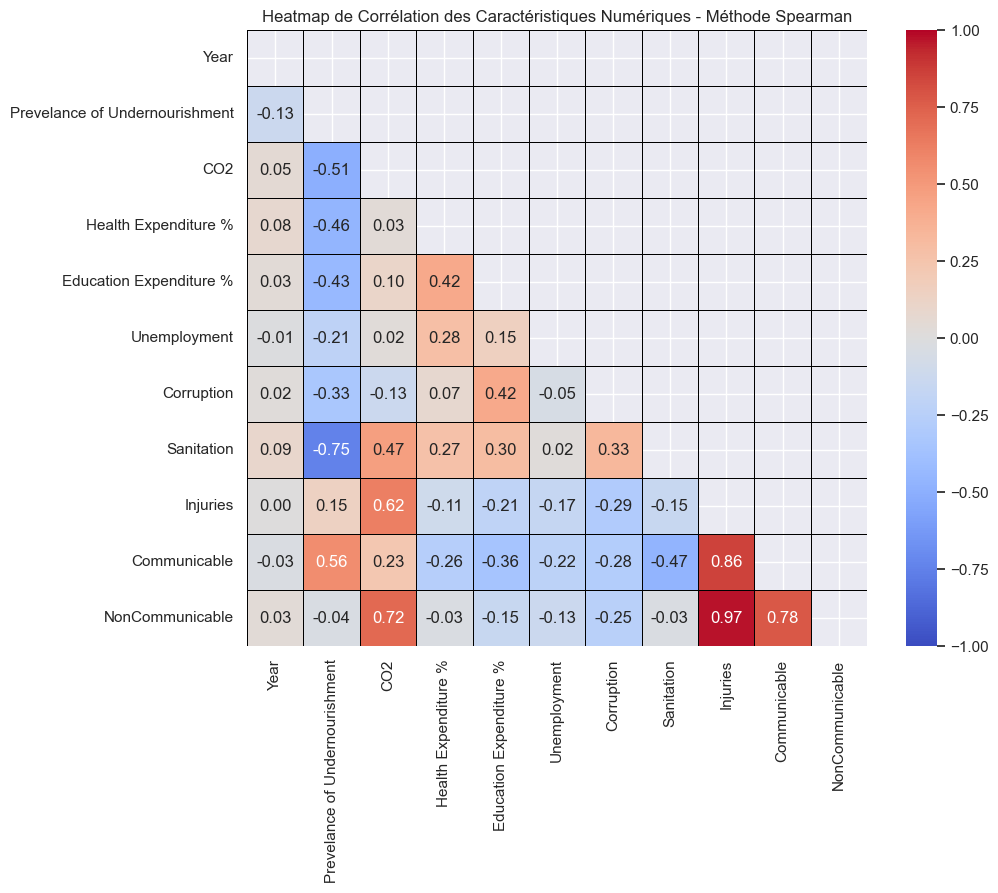

In [43]:
afficher_heatmap_correlation_spearman(X_train, num_features)

<h3 style="color: navy;">Analyse des corrélations apres traitement de valeurs abbérantes</h3>

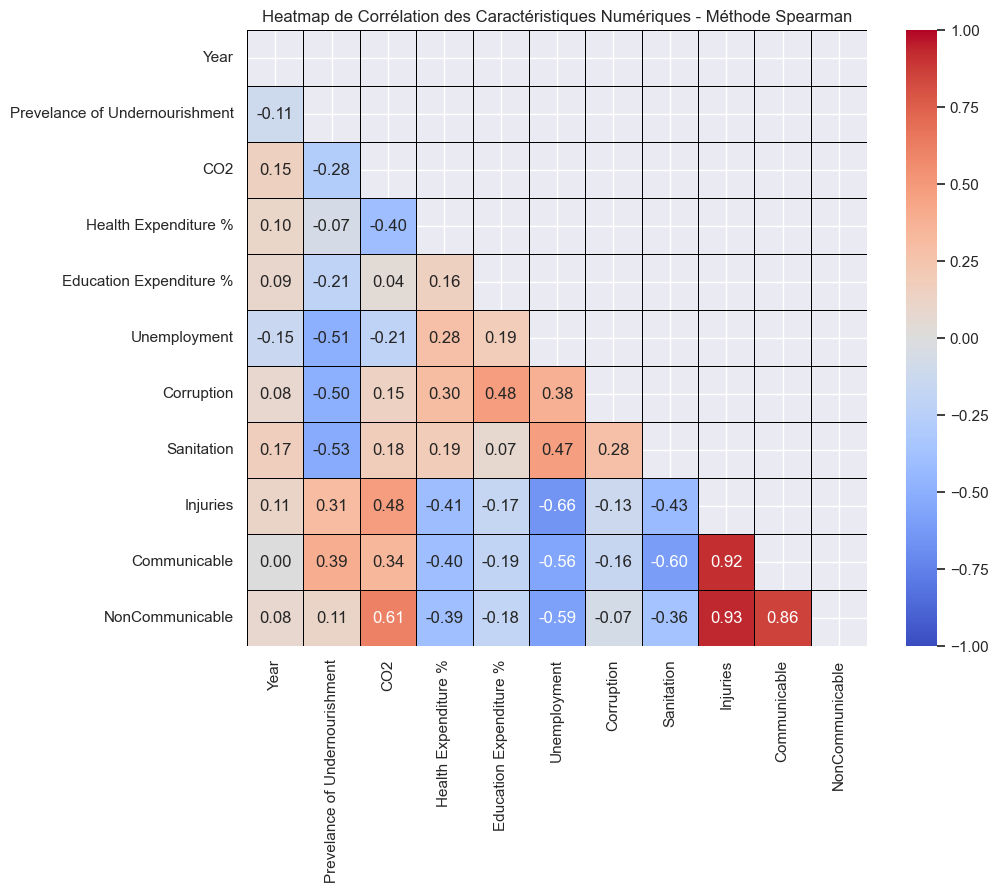

In [44]:
afficher_heatmap_correlation_spearman(df_scaled, num_features)

In [45]:
""" Suite a cette étape on pourrait faire du feature engineering ..., mais in vacontinuer sans faire cette étape """

' Suite a cette étape on pourrait faire du feature engineering ..., mais in vacontinuer sans faire cette étape '

In [46]:
X_train 

Country Name Country Code                      Region  \
0              Afghanistan          AFG                  South Asia   
1                   Angola          AGO          Sub-Saharan Africa   
2                  Albania          ALB       Europe & Central Asia   
3                  Andorra          AND       Europe & Central Asia   
4     United Arab Emirates          ARE  Middle East & North Africa   
...                    ...          ...                         ...   
2309               Eritrea          ERI          Sub-Saharan Africa   
2310                 Spain          ESP       Europe & Central Asia   
2311               Estonia          EST       Europe & Central Asia   
2312              Ethiopia          ETH          Sub-Saharan Africa   
2313               Finland          FIN       Europe & Central Asia   

              IncomeGroup  Year  Prevelance of Undernourishment  \
0              Low income  2001                            47.8   
1     Lower middle income  2001                            67.5   
2     Upper middle income  2001                             4.9   
3             High income  2001                             NaN   
4             High income  2001                             2.8   
...                   ...   ...                             ...   
2309           Low income  2014                             NaN   
2310          High income  2014                             2.5   
2311          High income  2014                             2.5   
2312           Low income  2014                            15.9   
2313          High income  2014                             2.5   

                CO2  Health Expenditure %  Education Expenditure %  \
0        730.000000                   NaN                      NaN   
1      15960.000000              4.483516                      NaN   
2       3230.000000              7.139524                  3.45870   
3        520.000000              5.865939                      NaN   
4      97200.000000              2.484370                      NaN   
...             ...                   ...                      ...   
2309     649.999976              4.057079                      NaN   
2310  240960.006714              9.089364                  4.30338   
2311   17940.000534              6.080776                  4.39433   
2312   12340.000153              4.033636                  4.60202   
2313   46159.999847              9.781151                  7.10237   

      Unemployment  Corruption  Sanitation    Injuries  Communicable  \
0        10.809000         NaN         NaN  2179727.10    9689193.70   
1         4.004000         NaN         NaN  1392080.71   11190210.53   
2        18.575001         NaN   40.520895   117081.67     140894.78   
3              NaN         NaN   21.788660     1697.99        695.56   
4         2.493000         NaN         NaN   144678.14      65271.91   
...            ...         ...         ...         ...           ...   
2309      5.673000         2.0         NaN   266289.21    1653687.38   
2310     24.440001         NaN   95.286449   881953.41     506672.67   
2311      7.350000         NaN   92.756915    47137.01      19176.07   
2312      2.262000         3.0    5.440000  2743703.69   26644753.50   
2313      8.660000         NaN   83.586067   179544.94      37415.44   

      NonCommunicable  
0          5795426.38  
1          2663516.34  
2           532324.75  
3            13636.64  
4           481740.70  
...               ...  
2309        889238.27  
2310      10912577.67  
2311        393340.21  
2312      11853944.35  
2313       1401496.01  

[2314 rows x 15 columns]

 <h2 style="color: darkblue;">c. Traitement des valeurs manquantes dans le jeu de données</h2>

In [61]:
# Imputation par la moyenne par groupe de revenu
y_train_= pd.DataFrame(y_train, columns=["Life Expectancy World Bank"])

train_indexes = df.loc[X_train.index]

group_means = train_indexes.groupby('IncomeGroup')['Life Expectancy World Bank'].mean()

y_train_['Life Expectancy World Bank'] = train_indexes.groupby('IncomeGroup')['Life Expectancy World Bank'].transform(lambda x: x.fillna(x.mean()))

X_train['Prevelance of Undernourishment'] = X_train.groupby('Region')['Prevelance of Undernourishment'].transform(lambda x: x.fillna(x.mean()))

X_train['CO2'] = X_train.groupby('Region')['CO2'].transform(lambda x: x.fillna(x.mean()))

X_train['Health Expenditure %'] = X_train.groupby('IncomeGroup')['Health Expenditure %'].transform(lambda x: x.fillna(x.mean()))

X_train['Education Expenditure %'] = X_train.groupby('IncomeGroup')['Education Expenditure %'].transform(lambda x: x.fillna(x.mean()))

X_train['Unemployment'] = X_train.groupby('Country Name')['Unemployment'].transform(lambda x: x.fillna(x.mean()))

X_train['Corruption'] = X_train.groupby('Country Name')['Corruption'].transform(lambda x: x.fillna(x.mean()))

X_train['Sanitation'] = X_train.groupby('Country Name')['Sanitation'].transform(lambda x: x.fillna(x.mean()))

C:\Users\mikae\AppData\Local\Temp\ipykernel_19632\2111103071.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mikae\AppData\Local\Temp\ipykernel_19632\2111103071.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mikae\AppData\Local\Temp\ipykernel_19632\2111103071.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

<Axes: >

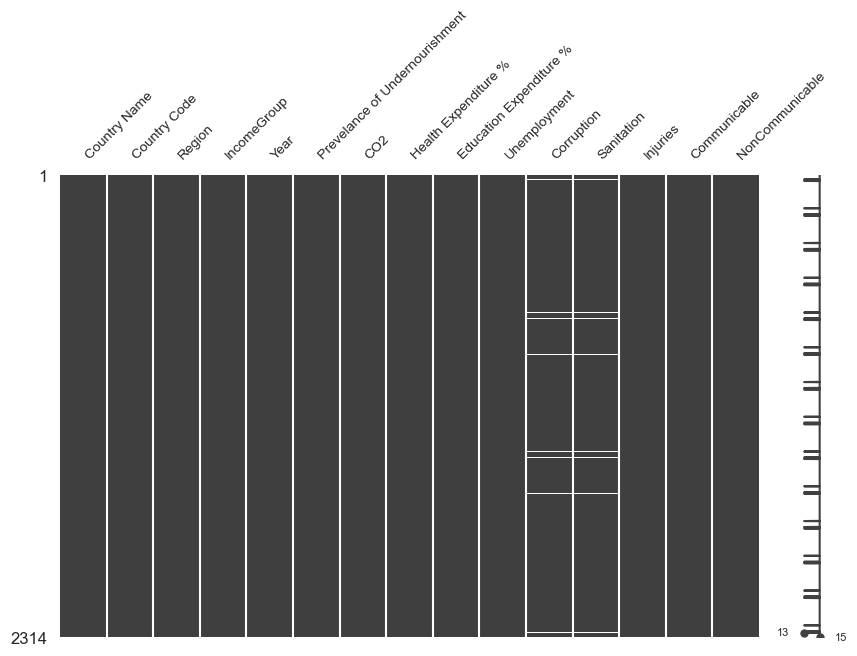

In [62]:
msno.matrix(X_train,figsize=(10,6), fontsize=10)

In [ ]:
# Exemple d'imputation par la médiane pour l'ensemble d'entraînement
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_val_imputed = imputer.transform(X_val)

 <h2 style="color: darkblue;">d. Analyse exploratoire des données (EDA)</h2>

<h1 style="color: navy;">Modélisation et évaluation des performances - Forecasting univarié</h1>

 <h2 style="color: darkblue;">a. Objectif</h2>

 <h2 style="color: darkblue;">b. Sélection de la variable explicative</h2>

 <h2 style="color: darkblue;">c. Modélisation</h2>

 <h2 style="color: darkblue;">d. Évaluation</h2>

<h1 style="color: navy;">Modélisation et évaluation des performances - Forecasting multivarié</h1>

<h2 style="color: darkblue;">a. Objectif</h2>

<h2 style="color: darkblue;">b. Sélection de la variable explicative</h2>

<h2 style="color: darkblue;">c. Modélisation</h2>

<h2 style="color: darkblue;">d. Évaluation</h2>

<h1 style="color: navy;">Modélisation et évaluation des performances - Autres techniques de forecasting</h1>

<h2 style="color: darkblue;">a. Objectif</h2>